# Final CHO Model
This notebook is to asses the validity of our reconstruction and how complete it is.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import cobra
from cobra import Model, Reaction, Metabolite
from cobra.io import validate_sbml_model, write_sbml_model
from tqdm.notebook import tqdm
from google_sheet import GoogleSheet

### 1. Retrieve information from the Google Sheet datasets reactions and metabolites

In [2]:
##### ----- Generate datasets from Google Sheet ----- #####

#Credential file
KEY_FILE_PATH = 'credentials.json'

# #CHO Network Reconstruction + Recon3D_v2 Google Sheet ID
# SPREADSHEET_ID = '1MlBXeHIKw8k8fZyXm-sN__AHTRSunJxar_-bqvukZws'

#CHO Network Reconstruction + Recon3D_v3 Google Sheet ID
SPREADSHEET_ID = '1MlBXeHIKw8k8fZyXm-sN__AHTRSunJxar_-bqvukZws'

# Initialize the GoogleSheet object
sheet = GoogleSheet(SPREADSHEET_ID, KEY_FILE_PATH)

# Read data from the Google Sheet
sheet_met = 'Metabolites'
sheet_rxns = 'Rxns'
sheet_attributes = 'Attributes'
sheet_boundary = 'BoundaryRxns'

metabolites = sheet.read_google_sheet(sheet_met)
rxns = sheet.read_google_sheet(sheet_rxns)
rxns_attributes = sheet.read_google_sheet(sheet_attributes)
boundary_rxns = sheet.read_google_sheet(sheet_boundary)

### 2. Build a model and feed it the information from the df generated

In [3]:
##### ----- Create a model and add reactions ----- #####
model = Model("iCHO")
lr = []
for _, row in rxns.iterrows():
    r = Reaction(row['Reaction'])
    lr.append(r)    
model.add_reactions(lr)
model

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-24


<Model iCHO at 0x149a7dff0>

In [4]:
##### ----- Add information to each one of the reactions ----- #####
for i,r in enumerate(tqdm(model.reactions)):
    print(r.id)
    r.build_reaction_from_string(rxns['Reaction Formula'][i])
    r.name = rxns['Reaction Name'][i]
    r.subsystem = rxns['Subsystem'][i]
    r.gene_reaction_rule = str(rxns['GPR_final'][i])
    r.lower_bound = float(rxns_attributes['Lower bound'][i])
    r.upper_bound = float(rxns_attributes['Upper bound'][i])    

  0%|          | 0/10692 [00:00<?, ?it/s]

10FTHF5GLUtl
unknown metabolite '10fthf5glu_c' created
unknown metabolite '10fthf5glu_l' created
10FTHF5GLUtm
unknown metabolite '10fthf5glu_m' created
10FTHF6GLUtl
unknown metabolite '10fthf6glu_c' created
unknown metabolite '10fthf6glu_l' created
10FTHF6GLUtm
unknown metabolite '10fthf6glu_m' created
10FTHF7GLUtl
unknown metabolite '10fthf7glu_c' created
unknown metabolite '10fthf7glu_l' created
10FTHF7GLUtm
unknown metabolite '10fthf7glu_m' created
10FTHFtl
unknown metabolite '10fthf_c' created
unknown metabolite '10fthf_l' created
10FTHFtm
unknown metabolite '10fthf_m' created
11DOCRTSLte
unknown metabolite '11docrtsl_c' created
unknown metabolite 'atp_c' created
unknown metabolite 'h2o_c' created
unknown metabolite '11docrtsl_e' created
unknown metabolite 'adp_c' created
unknown metabolite 'h_c' created
unknown metabolite 'pi_c' created
11DOCRTSLtm
unknown metabolite '11docrtsl_m' created
11DOCRTSLtr
unknown metabolite '11docrtsl_r' created
11DOCRTSTRNte
unknown metabolite '11docr

unknown metabolite '4hphac_c' created
4HOXPACDOX_NADP
4HPROLTASCT1
unknown metabolite '4hpro_LT_c' created
unknown metabolite 'ala_L_e' created
unknown metabolite '4hpro_LT_e' created
unknown metabolite 'ala_L_c' created
4HPRO_LTte
unknown metabolite '4hpro_LT_m' created
4MOPt2im
unknown metabolite '4mop_c' created
unknown metabolite '4mop_m' created
4MOPte
unknown metabolite '4mop_e' created
4MPTNLte
unknown metabolite '4mptnl_c' created
unknown metabolite '4mptnl_e' created
4MPTNLtm
unknown metabolite '4mptnl_m' created
4MPTNLtr
unknown metabolite '4mptnl_r' created
4MTOLBUTAMIDEte
unknown metabolite '4mtolbutamide_e' created
unknown metabolite '4mtolbutamide_c' created
4NPHSFte
unknown metabolite '4nphsf_e' created
unknown metabolite '4nphsf_c' created
4NPHSULT
unknown metabolite '4nph_c' created
4NPHte
unknown metabolite '4nph_e' created
4OHPROIMINOtc
unknown metabolite 'cl_e' created
unknown metabolite 'cl_c' created
4PYRDX
unknown metabolite '4pyrdx_c' created
unknown metabolite 

ALCD21_L
unknown metabolite '12ppd_S_c' created
unknown metabolite 'lald_L_c' created
ALCD22_D
ALCD22_L
ALCD2if
unknown metabolite 'etoh_c' created
ALCD2yf
ALDD19x
unknown metabolite 'pacald_c' created
unknown metabolite 'pac_c' created
ALDD19x_P
ALDD20x
unknown metabolite 'id3acald_c' created
unknown metabolite 'ind3ac_c' created
ALDD20xm
unknown metabolite 'id3acald_m' created
unknown metabolite 'ind3ac_m' created
ALDD21
unknown metabolite 'pristanal_c' created
unknown metabolite 'prist_c' created
ALDD2x
ALDD2xm
ALDD2y
ALDSTRNte
unknown metabolite 'aldstrn_c' created
unknown metabolite 'aldstrn_e' created
ALDSTRNtm
unknown metabolite 'aldstrn_m' created
ALKP
unknown metabolite 'dhap_c' created
unknown metabolite 'dha_c' created
ALLTTtm
unknown metabolite 'alltt_c' created
unknown metabolite 'alltt_m' created
ALOX12
unknown metabolite 'arachd_c' created
ALOX12R
unknown metabolite '12RHPET_c' created
ALOX15
ALOX5
unknown metabolite '5HPET_c' created
ALOX52
unknown metabolite 'leuktrA4_

unknown metabolite 'HC02191_e' created
C03990t
C04483t1
unknown metabolite 'dchac_e' created
C05299te
unknown metabolite 'C05299_c' created
unknown metabolite 'C05299_e' created
C05301te
unknown metabolite 'C05301_c' created
unknown metabolite 'C05301_e' created
C05302te
unknown metabolite 'C05302_c' created
unknown metabolite 'C05302_e' created
C05463t1
unknown metabolite 'tdechola_c' created
C05769te
unknown metabolite 'C05769_c' created
unknown metabolite 'C05769_e' created
C05769te3
C05770te
unknown metabolite 'C05770_c' created
unknown metabolite 'C05770_e' created
C05770te4
C09642te
unknown metabolite 'C09642_c' created
unknown metabolite 'C09642_e' created
C100CPT1
unknown metabolite 'c10crn_c' created
C101CPT1
unknown metabolite 'c101coa_c' created
unknown metabolite 'c101crn_c' created
C102CPT1
unknown metabolite 'decdicoa_c' created
unknown metabolite 'decdicrn_c' created
C10DCCACT
unknown metabolite 'c10dc_x' created
unknown metabolite 'c10dc_c' created
C10DCc
unknown metabo

CE4890te
unknown metabolite 'CE4890_c' created
unknown metabolite 'CE4890_e' created
CE4890te2
CE4968te
unknown metabolite 'CE4968_c' created
unknown metabolite 'CE4968_e' created
CE4970te
unknown metabolite 'CE4970_c' created
unknown metabolite 'CE4970_e' created
CE5025t
unknown metabolite 'CE5025_c' created
unknown metabolite 'CE5025_e' created
CE5026t
unknown metabolite 'CE5026_c' created
unknown metabolite 'CE5026_e' created
CE5072te
unknown metabolite 'CE5072_c' created
unknown metabolite 'CE5072_e' created
CE6205te
unknown metabolite 'CE6205_c' created
unknown metabolite 'CE6205_e' created
CE6247t
unknown metabolite 'CE6247_c' created
unknown metabolite 'CE6247_e' created
CE7085te
unknown metabolite 'CE7085_c' created
unknown metabolite 'CE7085_e' created
CE7090te
unknown metabolite 'CE7090_c' created
unknown metabolite 'CE7090_e' created
CE7096te
unknown metabolite 'CE7096_c' created
unknown metabolite 'CE7096_e' created
CEPTC
unknown metabolite 'dag_cho_c' created
unknown metab

Malformed gene_reaction_rule '(__cobra_escape__100766805 and __cobra_escape__3979182 and __cobra_escape__100768142 and __cobra_escape__100774773 and __cobra_escape__100750822 and __cobra_escape__100766032 and __cobra_escape__100759002 and __cobra_escape__100763175 and __cobra_escape__100764001 and __cobra_escape__100766809 and __cobra_escape__100768457 and __cobra_escape__100770670 and __cobra_escape__100757101 and __cobra_escape__103161269 and __cobra_escape__100755207 and __cobra_escape__100765757 and __cobra_escape__100762701) or (__cobra_escape__100766805 and __cobra_escape__100774773 and __cobra_escape__100768142 and __cobra_escape__3979182 and __cobra_escape__100750822 and __cobra_escape__100759002 and __cobra_escape__100766032 and __cobra_escape__100763175 and __cobra_escape__100764001 and __cobra_escape__100766809 __cobra_escape__100768457 and __cobra_escape__100770670 and __cobra_escape__100757101 and __cobra_escape__103161269 and __cobra_escape__100755207 and __cobra_escape__

GPR will be empty
/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/site-packages/cobra/core/gene.py:373: SyntaxWarning: Malformed gene_reaction_rule '__cobra_escape__100755207 and h1347 and h1329 and __cobra_escape__100770670 and __cobra_escape__100762701 and h9167 and h1350 and __cobra_escape__3979185 and h1349 and __cobra_escape__100757101 and __cobra_escape__103161269 and __cobra_escape__3979186 and __cobra_escape__100765757 and __cobra_escape__113837268 and __cobra_escape__3979189 and h170712 and __cobra_escape__113837643 and __cobra_escape__100766809 __cobra_escape__100768457 and __cobra_escape__100757022 and __cobra_escape__100764001'
  warn(


CYOOm3
unknown metabolite 'o2s_m' created
CYOOm3i
CYOR_u10m
unknown metabolite 'q10h2_m' created
CYOR_u10mi
CYP2R1
unknown metabolite 'vitd3_c' created
CYSALANaEx
CYSAMO
unknown metabolite 'cysam_c' created
CYSAMOe
unknown metabolite 'cysam_e' created
unknown metabolite 'hyptaur_e' created
CYSASNMETt
unknown metabolite 'cysasnmet_e' created
unknown metabolite 'cysasnmet_c' created
CYSASNNaEx
CYSASPPHEt
unknown metabolite 'cysaspphe_e' created
unknown metabolite 'cysaspphe_c' created
CYSATB0tc
CYSB0AT3tc
CYSCYSt
unknown metabolite 'cyscys_e' created
unknown metabolite 'cyscys_c' created
CYSGLNMETt
unknown metabolite 'cysglnmet_e' created
unknown metabolite 'cysglnmet_c' created
CYSGLNNaEx
CYSGLTH
unknown metabolite 'Lcystin_c' created
unknown metabolite 'gthrd_c' created
unknown metabolite 'gthox_c' created
CYSGLUHISt
unknown metabolite 'cysgluhis_e' created
unknown metabolite 'cysgluhis_c' created
CYSGLUTRPt
unknown metabolite 'cysglutrp_e' created
unknown metabolite 'cysglutrp_c' crea

unknown metabolite 'tmndnccoa_r' created
DESAT22_1p
DESAT22_2p
DESAT24_1
DESAT24_51
unknown metabolite 'tettet6coa_r' created
unknown metabolite 'tetpent6coa_r' created
DESAT24_6
unknown metabolite 'tetpent3coa_r' created
unknown metabolite 'tethex3coa_r' created
DGAT
unknown metabolite 'tag_cho_c' created
DGCHOLt2e
unknown metabolite 'dgchol_e' created
unknown metabolite 'lpdmd_e' created
unknown metabolite 'dgchol_c' created
unknown metabolite 'lpdmd_c' created
DGCHOLte
DGCHOLtx
DGK1
unknown metabolite 'dgmp_c' created
DGK2m
unknown metabolite 'dgmp_m' created
unknown metabolite 'dadp_m' created
unknown metabolite 'dgdp_m' created
DGNSKm
unknown metabolite 'dgsn_m' created
DGSNt
unknown metabolite 'dgsn_e' created
unknown metabolite 'dgsn_c' created
DGSNtm
DGTPtm
unknown metabolite 'dgtp_m' created
DGTPtn
DGULND
unknown metabolite '3dhguln_c' created
DHAAt1r
unknown metabolite 'dhdascb_e' created
DHAK
DHAPA
DHAPAx
unknown metabolite 'Rtotalcoa_x' created
unknown metabolite 'dhap_x' c

F1PGT
unknown metabolite 'fuc1p_L_c' created
unknown metabolite 'gdpfuc_c' created
F6T2g
unknown metabolite 'gdpfuc_g' created
unknown metabolite 'nm4masn_g' created
unknown metabolite 'fnm4masn_g' created
unknown metabolite 'gdp_g' created
F6T3g
unknown metabolite 'nm2masn_g' created
unknown metabolite 'fnm2masn_g' created
F6T4g
unknown metabolite 'n3m2masn_g' created
unknown metabolite 'fn3m2masn_g' created
F6T5g
unknown metabolite 'n4m2masn_g' created
unknown metabolite 'fn4m2masn_g' created
F6T6g
unknown metabolite 'n3rm2masn_g' created
unknown metabolite 'fn3rm2masn_g' created
F6Tg
unknown metabolite 'n2m2masn_g' created
unknown metabolite 'fn2m2masn_g' created
FA100ACPH
FA120ACPH
FA140ACPH
unknown metabolite 'ttdca_c' created
FA141ACPH
unknown metabolite 'tdeACP_c' created
unknown metabolite 'ttdcea_c' created
FA160ACPH
FA161ACPH
unknown metabolite 'hdeACP_c' created
unknown metabolite 'hdcea_c' created
FA180ACPH
unknown metabolite 'ocdca_c' created
FA181ACPH
unknown metabolite '

FAOXC164C143x
unknown metabolite '2hexdtetcoa_x' created
FAOXC164C163x
FAOXC164C165m
unknown metabolite '4hexdtetcoa_m' created
unknown metabolite 'hexdpencoa_m' created
FAOXC164C165x
unknown metabolite '4hexdtetcoa_x' created
unknown metabolite 'hexdpencoa_x' created
FAOXC164GC163m
FAOXC164_4Z_7Z_10Z_13Zm
FAOXC164_4Z_7Z_10Z_13Zx
FAOXC164m
unknown metabolite '3hexdtetcoa_m' created
FAOXC164x
unknown metabolite '3hexdtetcoa_x' created
FAOXC165C164m
FAOXC165C164x
FAOXC16Brx
unknown metabolite 'phyt_x' created
unknown metabolite 'phytcoa_x' created
FAOXC16C16OHm
unknown metabolite '3hexdcoa_m' created
FAOXC16DCC14DCx
unknown metabolite 'hexdicoa_x' created
FAOXC16DCr
unknown metabolite 'hexdiac_r' created
unknown metabolite 'hexdicoa_r' created
FAOXC16OHC16r
unknown metabolite 'hdca_r' created
unknown metabolite 'whhdca_r' created
FAOXC170150m
FAOXC170m
FAOXC180
FAOXC180x
FAOXC1811601m
FAOXC1811602m
FAOXC1811603m
FAOXC181C161m
FAOXC181C161x
FAOXC181C181OHm
unknown metabolite 'octdececoa_m

FUT14g
FUT15g
FUT16g
FUT17g
FUT18g
FUT31g
FUT32g
unknown metabolite 'acngalacglcgalgluside_cho_g' created
FUT33g
FUT34g
FUT35g
FUT910g
unknown metabolite 'fucgalacglc13galacglcgal14acglcgalgluside_cho_g' created
unknown metabolite 'fucfucgalacglc13galacglcgal14acglcgalgluside_cho_g' created
FUT911g
FUT91g
FUT92g
unknown metabolite 'acngal14acglcgalgluside_cho_g' created
FUT93g
FUT94g
unknown metabolite 'fucfucgalacglcgal14acglcgalgluside_cho_g' created
FUT95g
FUT96g
unknown metabolite 'fuc132galacglcgal14acglcgalgluside_cho_g' created
FUT97g
FUT98g
FUT99g
G12MT1
unknown metabolite 'm2mpdol_c' created
unknown metabolite 'm3mpdol_c' created
G12MT2
unknown metabolite 'm4mpdol_c' created
G13MT
unknown metabolite 'm1mpdol_c' created
G14N10g
unknown metabolite 'ndl4fn4m2masn_g' created
unknown metabolite 'lndl4fn4m2masn_g' created
G14N11g
unknown metabolite 'ndl4n4m2masn_g' created
unknown metabolite 'lndl4n4m2masn_g' created
G14N12g
unknown metabolite 'ncl4fn4m2masn_g' created
unknown metab

GLCGLUT2
GLCMter
GLCNACASE1ly
unknown metabolite 'hs_deg3_l' created
unknown metabolite 'hs_deg4_l' created
GLCNACASE2ly
unknown metabolite 'hs_deg8_l' created
GLCNACASE3ly
unknown metabolite 'hs_deg14_l' created
unknown metabolite 'hs_deg15_l' created
GLCNACASE4ly
unknown metabolite 'hs_deg20_l' created
unknown metabolite 'hs_deg21_l' created
GLCNACASE5ly
unknown metabolite 'hs_deg24_l' created
unknown metabolite 'hs_deg25_l' created
GLCNACDASg
unknown metabolite 'hs_pre9_g' created
GLCNACPT
unknown metabolite 'uacgam_c' created
unknown metabolite 'naglc2p_c' created
GLCNACT
GLCNACT2g
GLCNACT3g
GLCNACT4g
GLCNACT5g
GLCNCTg
unknown metabolite 'oglcnc_ser_thr_g' created
GLCNte
unknown metabolite 'glcn_e' created
GLCRt1
unknown metabolite 'glcr_e' created
GLCSGLT1le
GLCURter
unknown metabolite 'glcur_c' created
unknown metabolite 'glcur_r' created
GLCURtly
GLCt1r
GLCt2_2
GLCt2r
GLCt4
GLCt4_2
GLCter
GLCtg
unknown metabolite 'glc_D_g' created
GLCtly
GLDBRAN
unknown metabolite 'dxtrn_c' crea

Malformed gene_reaction_rule '__cobra_escape__100750552 and __cobra_escape__100756663 __cobra_escape__100756951 __cobra_escape__100766960' for 100750552 and 100756663 100756951 100766960
Traceback (most recent call last):
  File "/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/site-packages/cobra/core/gene.py", line 350, in from_string
    tree = ast_parse(escaped_str, "<string>", "eval")
  File "/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/ast.py", line 50, in parse
    return compile(source, filename, mode, flags,
  File "<string>", line 1
    __cobra_escape__100750552 and __cobra_escape__100756663 __cobra_escape__100756951 __cobra_escape__100766960
                                                            ^^^^^^^^^^^^^^^^^^^^^^^^^
SyntaxError: invalid syntax

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/site-packages/cobra/core/gene.py

HEXA3e
unknown metabolite 'gm2_cho_e' created
unknown metabolite 'acgal_e' created
unknown metabolite 'gm3_cho_e' created
HEXAHBl
HEXCCOAtr
unknown metabolite 'hexccoa_r' created
HEXCCOAtx
HEXCCPT1
unknown metabolite 'hexccrn_c' created
HEXCCPT2
unknown metabolite 'hexccrn_m' created
unknown metabolite 'hexccoa_m' created
HEXCCRNt
HEXCOAACBP
HEXCt
unknown metabolite 'hexc_e' created
HEXDCRNe
HEXDECEETH
unknown metabolite 'pe161_hs_e' created
unknown metabolite 'hexdeceethe' created
HEXDICOAACBP
HEXDICOAACBPx
HEXDTRm
unknown metabolite 'hexdtr_m' created
HEXDTRtm
unknown metabolite 'hexdtr_c' created
HEXGLYc
unknown metabolite 'hexgly_c' created
HEXTT
unknown metabolite 'hexdp_c' created
unknown metabolite 'hepdp_c' created
HGDm
HGNTOR
unknown metabolite '4mlacac_c' created
HGTHFS
HIBDm
HISARGCYSt
unknown metabolite 'hisargcys_e' created
unknown metabolite 'hisargcys_c' created
HISARGSERt
unknown metabolite 'hisargser_e' created
unknown metabolite 'hisargser_c' created
HISASPt
unknown m

Malformed gene_reaction_rule '__cobra_escape__100756663 __cobra_escape__100756951 __cobra_escape__100766960 or __cobra_escape__100773287 or __cobra_escape__100750552' for 100756663 100756951 100766960 or 100773287 or 100750552
Traceback (most recent call last):
  File "/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/site-packages/cobra/core/gene.py", line 350, in from_string
    tree = ast_parse(escaped_str, "<string>", "eval")
  File "/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/ast.py", line 50, in parse
    return compile(source, filename, mode, flags,
  File "<string>", line 1
    __cobra_escape__100756663 __cobra_escape__100756951 __cobra_escape__100766960 or __cobra_escape__100773287 or __cobra_escape__100750552
                              ^^^^^^^^^^^^^^^^^^^^^^^^^
SyntaxError: invalid syntax

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pablodigiusto/miniforge3/envs/mncho/lib/pytho

HMR_0822
HMR_0823
unknown metabolite 'gd1a_cho_c' created
HMR_0824
unknown metabolite 'gm3_cho_c' created
HMR_0825
HMR_0827
unknown metabolite 'gm2_cho_c' created
HMR_0828
HMR_0829
HMR_0830
HMR_0834
unknown metabolite 'M03160_l' created
HMR_0835
unknown metabolite 'M02012_l' created
unknown metabolite 'M02013_l' created
HMR_0836
HMR_0837
HMR_0839
HMR_0840
unknown metabolite 'gt1alpha_cho_c' created
HMR_0841
HMR_0842
unknown metabolite 'gd2_cho_c' created
HMR_0843
unknown metabolite 'gd1b_cho_c' created
HMR_0844
unknown metabolite 'gt1b_cho_c' created
HMR_0846
HMR_0847
HMR_0848
HMR_0849
HMR_0851
HMR_0852
HMR_0853
HMR_0854
HMR_0855
HMR_0856
unknown metabolite 'gt2_cho_c' created
HMR_0857
unknown metabolite 'gt1c_cho_c' created
HMR_0859
unknown metabolite 'acglcgalgluside_cho_c' created
HMR_0860
unknown metabolite 'galacglcgalgluside_cho_c' created
HMR_0861
unknown metabolite 'M00808_c' created
HMR_0862
unknown metabolite 'M01849_c' created
HMR_0863
unknown metabolite 'M01860_c' created
H

HMR_1935
unknown metabolite 'M00579_c' created
HMR_1941
HMR_1942
unknown metabolite 'M02828_c' created
unknown metabolite 'M02665_c' created
HMR_1943
unknown metabolite 'M01184_c' created
HMR_1944
HMR_1948
unknown metabolite 'M00406_c' created
HMR_1949
HMR_1950
unknown metabolite 'M00283_c' created
HMR_1951
HMR_1958
HMR_1962
HMR_1967
unknown metabolite 'M01075_c' created
HMR_1968
unknown metabolite 'M01075_r' created
HMR_1970
HMR_1971
unknown metabolite 'andrstndn_r' created
HMR_1976
unknown metabolite 'tststerone_c' created
HMR_1979
unknown metabolite 'M02760_c' created
HMR_1980
HMR_1981
HMR_1982
unknown metabolite 'M02761_c' created
HMR_1983
HMR_1988
HMR_1989
unknown metabolite 'M00603_c' created
HMR_1990
HMR_1991
unknown metabolite 'M00285_c' created
HMR_1992
HMR_1993
HMR_1996
unknown metabolite 'cortsn_c' created
HMR_2002
HMR_2003
unknown metabolite 'M00759_c' created
HMR_2007
HMR_2010
unknown metabolite 'M00429_m' created
HMR_2011
HMR_2014
HMR_2016
HMR_2018
HMR_2029
unknown metabo

HMR_2690
unknown metabolite 'M00122_c' created
HMR_2691
unknown metabolite 'M00122_m' created
HMR_2692
unknown metabolite 'M00123_m' created
HMR_2693
unknown metabolite 'M00100_c' created
HMR_2695
unknown metabolite 'M00100_m' created
HMR_2697
unknown metabolite 'M00101_m' created
HMR_2699
unknown metabolite 'M02051_c' created
HMR_2700
unknown metabolite 'M02051_m' created
HMR_2701
unknown metabolite 'M02052_m' created
HMR_2702
unknown metabolite 'M01724_c' created
HMR_2703
unknown metabolite 'M01724_m' created
HMR_2704
unknown metabolite 'docoscoa_m' created
HMR_2705
unknown metabolite 'M01727_c' created
HMR_2706
unknown metabolite 'M01727_m' created
HMR_2707
unknown metabolite 'CE5155_m' created
HMR_2708
unknown metabolite 'M01726_c' created
HMR_2709
unknown metabolite 'M01726_m' created
HMR_2710
unknown metabolite 'M00006_m' created
HMR_2711
unknown metabolite 'M02637_c' created
HMR_2712
unknown metabolite 'M02637_m' created
HMR_2713
HMR_2715
unknown metabolite 'strdnccrn_c' created

HMR_3201
HMR_3202
unknown metabolite 'M00063_m' created
HMR_3203
unknown metabolite 'M00797_m' created
HMR_3204
unknown metabolite 'M00899_m' created
HMR_3205
HMR_3218
unknown metabolite 'CE5154_m' created
HMR_3219
unknown metabolite 'CE5153_m' created
HMR_3220
unknown metabolite 'CE5152_m' created
HMR_3221
HMR_3222
unknown metabolite 'CE5150_m' created
HMR_3223
unknown metabolite 'CE5148_m' created
HMR_3224
unknown metabolite 'CE5144_m' created
HMR_3225
HMR_3229
unknown metabolite 'HC10858_m' created
HMR_3230
unknown metabolite 'M03019_m' created
HMR_3231
HMR_3232
unknown metabolite 'M00849_m' created
HMR_3233
HMR_3234
unknown metabolite 'M03022_m' created
HMR_3235
unknown metabolite 'M01573_m' created
HMR_3236
HMR_3237
HMR_3240
unknown metabolite 'M03014_m' created
HMR_3241
unknown metabolite 'M00702_m' created
HMR_3242
unknown metabolite 'M00843_m' created
HMR_3243
HMR_3244
unknown metabolite 'M03024_m' created
HMR_3245
unknown metabolite 'M00170_m' created
HMR_3246
unknown metaboli

HMR_3692
HMR_3694
HMR_3695
HMR_3696
HMR_3698
HMR_3699
HMR_3701
HMR_3702
unknown metabolite 'M00115_r' created
HMR_3703
HMR_3704
HMR_3705
HMR_3706
HMR_3707
HMR_3708
HMR_3709
HMR_3710
HMR_3711
HMR_3712
HMR_3713
HMR_3714
HMR_3715
HMR_3716
HMR_3717
HMR_3718
HMR_3719
HMR_3721
HMR_3722
HMR_3723
unknown metabolite 'tmndnc_r' created
HMR_3724
HMR_3725
HMR_3726
unknown metabolite 'tethex3_r' created
HMR_3727
HMR_3728
HMR_3729
HMR_3730
unknown metabolite 'M00260_r' created
HMR_3731
unknown metabolite 'M00315_r' created
HMR_3734
HMR_3736
HMR_3737
HMR_3738
unknown metabolite 'tetpent6_r' created
HMR_3739
HMR_3740
HMR_3741
HMR_3742
unknown metabolite 'M00265_r' created
HMR_3831
HMR_3855
HMR_3859
HMR_3864
HMR_3915
HMR_3966
HMR_4072
unknown metabolite 'dna_c' created
unknown metabolite 'dna5mtc_c' created
HMR_4079
HMR_4124
HMR_4227
unknown metabolite 'M01572_c' created
HMR_4241
unknown metabolite 'Nmelys_n' created
unknown metabolite 'M02127_n' created
HMR_4261
HMR_4270
HMR_4278
unknown metabolite 'n

HMR_7747
HMR_7748
HMR_7749
HMR_7755
unknown metabolite 'dha_e' created
unknown metabolite 'dhap_e' created
HMR_7756
HMR_7757
HMR_7758
unknown metabolite 'cholcoa_c' created
HMR_7759
unknown metabolite 'citr_L_g' created
HMR_7760
unknown metabolite 'dopa_m' created
HMR_7761
unknown metabolite 'dopa_g' created
HMR_8211
unknown metabolite 'HC02065_l' created
HMR_8271
HMR_8287
HMR_8378
unknown metabolite 'M02645_c' created
unknown metabolite 'Ser_Gly_Ala_X_Gly_c' created
HMR_8395
unknown metabolite 'HC02057_r' created
HMR_8397
HMR_8399
HMR_8476
HMR_8501
HMR_8570
unknown metabolite 'CE2838_c' created
HMR_8571
unknown metabolite 'CE2838_e' created
HMR_8580
HMR_8582
HMR_8585
unknown metabolite 'M01966_c' created
HMR_8608
unknown metabolite '1p2cbxl_c' created
HMR_8643
unknown metabolite 'egme_c' created
HMR_8746
unknown metabolite 'thmpp_c' created
unknown metabolite 'M00561_c' created
HMR_8761
unknown metabolite 'tagat_D_c' created
unknown metabolite 'HC00664_c' created
HMR_8762
HMR_8796
unk

ILEGLYARGt
unknown metabolite 'ileglyarg_e' created
unknown metabolite 'ileglyarg_c' created
ILELAT1tc
ILEOX
ILEPHELAT2tc
ILEPROLYSt
unknown metabolite 'ileprolys_e' created
unknown metabolite 'ileprolys_c' created
ILESERARGt
unknown metabolite 'ileserarg_e' created
unknown metabolite 'ileserarg_c' created
ILETA
ILETAm
unknown metabolite 'ile_L_m' created
ILETRAH
unknown metabolite 'iletrna_c' created
unknown metabolite 'trnaile_c' created
ILETRAHm
unknown metabolite 'iletrna_m' created
unknown metabolite 'trnaile_m' created
ILETRPTYRt
unknown metabolite 'iletrptyr_e' created
unknown metabolite 'iletrptyr_c' created
ILETRS
ILETRSm
ILEt4
ILEt5m
ILEt7l
ILEtec
IMACTD
unknown metabolite 'im4ac_c' created
IMACTD_m
unknown metabolite 'im4act_m' created
unknown metabolite 'im4ac_m' created
IMAGH
unknown metabolite 'isomal_e' created
IMPC
IMPD
IND3ACt
unknown metabolite 'ind3ac_e' created
IND3ACtm
INDOXYLF
unknown metabolite 'indole_c' created
unknown metabolite 'indoxyl_c' created
INDSF
unkno

M13N4T2g
M13N4T3g
M13N4Tg
M14NTg
unknown metabolite 'n2m2nmasn_g' created
M1613N1614N3T1g
M1613N1614N3T2g
M1613N3xN3T1g
M1613N3xN3T2g
M16N1216N3T1g
M16N1216N3T2g
M16N12N3T1g
M16N12N3T2g
M16N16N3T1g
M16N16N3T2g
M16N4Tg
M16N4Tg_new1
unknown metabolite 'l5fn5m2masn_g' created
M16N4Tg_new2
unknown metabolite 'l6fn6m2masn_g' created
M16N6T1g
M16N6T2g
M16N6T3g
M16N6Tg
M16NT1g
M16NTg
M4ATAer
unknown metabolite 'm_em_3gacpail_cho_r' created
unknown metabolite 'm_em_3gacpail_prot_cho_r' created
M4BET2er
M4BTAer
unknown metabolite 'mem2emgacpail_prot_cho_r' created
M4CET3er
M4MASNt
unknown metabolite 'm4masn_e' created
M4MASNtly
M4MPDOL_ter
M7MASNBterg
unknown metabolite 'm7masnB_r' created
unknown metabolite 'm7masnB_g' created
M8MASNterg
unknown metabolite 'm8masn_r' created
unknown metabolite 'm8masn_g' created
MACACI
MACOXO
unknown metabolite '3mldz_c' created
MAGLINL_HSe
unknown metabolite 'maglinl_hs_e' created
MAGOLE_HSe
unknown metabolite 'magole_hs_e' created
MAGt
MALACONtm
MALCH
unknow

unknown metabolite 'pectingchol_e' created
PECGONCOATr
unknown metabolite 'pecgoncoa_r' created
PECTCHLe
unknown metabolite 'pectintchol_e' created
PEDH12_HSPLA2
PEDH13_HSPLA2
unknown metabolite 'pe13_hs_c' created
PEDH14_HSPLA2
PEDH15_HSPLA2
PEDH161_HSPLA2
PEDH17_HSPLA2
PEDH203_HSABCt
unknown metabolite 'pedh203_hs_c' created
PEDH203_HSPLA2
PEFLIP
PEFLIPm
unknown metabolite 'pe_cho_m' created
PEHSFABPe
PELINETH
unknown metabolite 'linethe' created
PELINL_HSABCt
unknown metabolite 'pelinl_hs_c' created
PELINL_HSPLA2
PELPALM_HSABCt
unknown metabolite 'pepalm_hs_c' created
PENDECAETH
unknown metabolite 'pendecaethe' created
PEOLE_HSABCt
unknown metabolite 'peole_hs_c' created
PEOLE_HSPLA2
PEPACONtm
PEPALM
unknown metabolite 'pmethe' created
PEPALM_HSASBCt
PEPALM_HSPLA2
PEPCK
PEPCKm
PEPLYStn
unknown metabolite 'peplys_e' created
PERILLYLte
unknown metabolite 'perillyl_e' created
PEROXx
PESTE_HSABCt
unknown metabolite 'peste_hs_c' created
PETHCT
PETOHMm_hs
PETOHMr_hs
PE_HStg
unknown metabo

PROTsyn_prod
unknown metabolite 'prot_prod_c' created
PROVALGLNt
unknown metabolite 'provalgln_e' created
unknown metabolite 'provalgln_c' created
PRO_Dtde
PROt2r
PROt2rL
PROt4
PROt4_2_r
PROtm
PRPNCOAHYDm
PRPNCOAHYDx
unknown metabolite 'prpncoa_x' created
unknown metabolite '3hpcoa_x' created
PRPPS
PRSDO
unknown metabolite 'Sgglutth_m' created
unknown metabolite 'h2so3_m' created
PRSOTGEPS
PSDm_hs
unknown metabolite 'ps_cho_m' created
PSERT
unknown metabolite 'pser_L_c' created
PSFLIP
unknown metabolite 'ps_cho_e' created
PSFLIPm
PSHSABCtc
PSP_L
PSSA1_hs
PSSA2_hs
PSYGCHe
unknown metabolite 'psyl_e' created
unknown metabolite 'psylchol_e' created
PSYTCHe
unknown metabolite 'psyltchol_e' created
PSYTDECHe
unknown metabolite 'psyltdechol_e' created
PS_HSter
unknown metabolite 'ps_cho_r' created
PS_HStg
unknown metabolite 'ps_cho_g' created
PSt3
PTA2
unknown metabolite 'ppap_c' created
PTCRTD
PTDCACRNCPT1
PTDCACRNCPT2
PTDCACRNt
PTDCAt
PTE1x
PTE2x
PTE3x
PTE4x
PTE5x
PTGFS
PTHPS
unknown metab

RE1096C
RE1096M
unknown metabolite '17ahprgstrn_m' created
unknown metabolite 'andrstndn_m' created
RE1099C
RE1099G
unknown metabolite 'CE1352_g' created
unknown metabolite '17ahprgnlone_g' created
RE1099L
unknown metabolite 'CE1352_l' created
unknown metabolite '17ahprgnlone_l' created
RE1099R
unknown metabolite 'CE1352_r' created
RE1100G
unknown metabolite 'chsterols_g' created
RE1100L
unknown metabolite 'chsterols_l' created
RE1134C
RE1134M
unknown metabolite '17ahprgnlone_m' created
unknown metabolite 'dhea_m' created
RE1135G
unknown metabolite 'prgnlones_g' created
unknown metabolite 'prgnlone_g' created
RE1135L
unknown metabolite 'prgnlones_l' created
unknown metabolite 'prgnlone_l' created
RE1233C
RE1233M
RE1234C
RE1235C
RE1236C
unknown metabolite 'CE1059_c' created
RE1238X
unknown metabolite 'N1sprm_x' created
RE1240C
unknown metabolite 'C03413_c' created
RE1266C
unknown metabolite 'CE2028_c' created
RE1308C
unknown metabolite 'CE2201_c' created
RE1308M
RE1309C
unknown metaboli

RE2440C
unknown metabolite 'CE5860_c' created
RE2442C
unknown metabolite 'CE2095_c' created
unknown metabolite 'CE3086_c' created
RE2443C
unknown metabolite 'CE3092_c' created
RE2443M
unknown metabolite 'CE2095_m' created
unknown metabolite 'CE3092_m' created
RE2444C
unknown metabolite 'CE5829_c' created
unknown metabolite 'CE5865_c' created
unknown metabolite 'CE5866_c' created
RE2445C
unknown metabolite 'CE5867_c' created
unknown metabolite 'CE5868_c' created
unknown metabolite 'CE5869_c' created
RE2445E
unknown metabolite 'CE5867_e' created
unknown metabolite 'CE5868_e' created
unknown metabolite 'CE5869_e' created
RE2452C
unknown metabolite 'CE5016_c' created
RE2453M
unknown metabolite 'CE5875_m' created
RE2454M
unknown metabolite 'CE5068_m' created
RE2459C
unknown metabolite 'CE2102_c' created
RE2474C
unknown metabolite 'C06948_c' created
unknown metabolite 'C07486_c' created
RE2474R
unknown metabolite 'C06948_r' created
unknown metabolite 'C07486_r' created
unknown metabolite 'fa

unknown metabolite 'CE4820_c' created
RE3124R
unknown metabolite 'CE4820_r' created
RE3125C
unknown metabolite 'CE4818_c' created
RE3125R
unknown metabolite 'CE4818_r' created
RE3126C
RE3126R
RE3132R
RE3134C
unknown metabolite 'CE2313_c' created
RE3134R
unknown metabolite 'CE2313_r' created
unknown metabolite 'CE2314_r' created
RE3136C
RE3139X
unknown metabolite 'CE4826_x' created
unknown metabolite 'CE4827_x' created
RE3140X
unknown metabolite 'CE4828_x' created
RE3141X
RE3144C
unknown metabolite 'CE6027_c' created
RE3144M
unknown metabolite 'CE6027_m' created
RE3145X
RE3146R
RE3147R
unknown metabolite 'CE4827_r' created
RE3148C
RE3148R
RE3150C
unknown metabolite 'CE4830_c' created
unknown metabolite 'CE4837_c' created
RE3150R
unknown metabolite 'CE4830_r' created
unknown metabolite 'CE4837_r' created
RE3151C
unknown metabolite 'CE4833_c' created
RE3151R
unknown metabolite 'CE4833_r' created
RE3152C
unknown metabolite 'CE4831_c' created
RE3152R
unknown metabolite 'CE4831_r' created
RE

RE3488R
unknown metabolite 'CE7091_r' created
RE3488X
unknown metabolite 'CE7091_x' created
RE3490C
unknown metabolite 'CE7082_c' created
RE3491C
unknown metabolite 'CE7083_c' created
RE3492C
unknown metabolite 'CE7084_c' created
RE3493C
RE3494C
unknown metabolite 'CE7086_c' created
unknown metabolite 'CE7087_c' created
RE3495C
RE3496C
unknown metabolite 'HC02213_c' created
RE3496N
unknown metabolite 'HC02213_n' created
RE3498N
unknown metabolite 'CE7081_n' created
unknown metabolite 'CE7109_n' created
RE3498R
unknown metabolite 'CE7081_r' created
unknown metabolite 'CE7109_r' created
RE3499C
unknown metabolite 'CE7110_c' created
unknown metabolite 'CE7114_c' created
RE3500C
unknown metabolite 'CE7113_c' created
RE3500R
unknown metabolite 'CE7113_r' created
RE3500X
unknown metabolite 'CE7113_x' created
RE3501C
unknown metabolite 'CE7112_c' created
RE3501R
unknown metabolite 'CE7112_r' created
RE3501X
unknown metabolite 'CE7112_x' created
RE3502C
unknown metabolite 'CE7111_c' created
RE

unknown metabolite 'saccrp_L_m' created
SACCD4m
SADT
SADTn
unknown metabolite 'so4_n' created
SALMCOM
SALMCOM2
SAMHISTA
SAMHISTAe
unknown metabolite 'amet_e' created
SARCOXp
unknown metabolite 'sarcs_x' created
unknown metabolite 'fald_x' created
SARCStex
unknown metabolite 'sarcs_e' created
SARCStm
SARCStp
SARDHm
SAT1
SBCOAACOTx
unknown metabolite 'subeac_x' created
SBPP1er
unknown metabolite 'sph1p_r' created
SBPP3er
unknown metabolite 'sphs1p_r' created
SBTD_D2
SBTR
SBT_Dtde
unknown metabolite 'sbt_D_e' created
SCP21cx
SCP21x
SCP22x
SCP2x
SCPx
SEAHCYSHYD
unknown metabolite 'seahcys_c' created
SEAHCYStn
SEASMETtn
unknown metabolite 'seasmet_c' created
SEBACACT
SEBACIDTD
unknown metabolite 'sebacid_x' created
SEBCOACROT
SEBCOAPET
SELADT
unknown metabolite 'sel_c' created
SELCYSLY
SELCYSLY2
SELCYSTGL
SELCYSTS
SELMETAT
SELMETHte
unknown metabolite 'selmeth_e' created
SELNPS
SELt4_3
unknown metabolite 'sel_e' created
SERALANaEx
SERARGALAt
unknown metabolite 'serargala_e' created
unknown 

TRESULT
unknown metabolite 'tres_c' created
TRIDECETH
unknown metabolite 'trideceth_e' created
TRIODTHYSUFt
unknown metabolite 'triodthysuf_e' created
TRIODTHYSULT
TRIODTHYt
unknown metabolite 'triodthy_e' created
TRIODTHYt2
TRIOK
TRPALAPROt
unknown metabolite 'trpalapro_e' created
unknown metabolite 'trpalapro_c' created
TRPARGALAt
unknown metabolite 'trpargala_e' created
unknown metabolite 'trpargala_c' created
TRPASPASPt
unknown metabolite 'trpaspasp_e' created
unknown metabolite 'trpaspasp_c' created
TRPATB0tc
TRPB0AT3tc
TRPGLNGLNt
unknown metabolite 'trpglngln_e' created
unknown metabolite 'trpglngln_c' created
TRPGLUGLYt
unknown metabolite 'trpglugly_e' created
unknown metabolite 'trpglugly_c' created
TRPGLULEUt
unknown metabolite 'trpgluleu_e' created
unknown metabolite 'trpgluleu_c' created
TRPGLUPROt
unknown metabolite 'trpglupro_e' created
unknown metabolite 'trpglupro_c' created
TRPGLUTYRt
unknown metabolite 'trpglutyr_e' created
unknown metabolite 'trpglutyr_c' created
TRPG

unknown metabolite 'xoldiolone_e' created
XOLDIOLONEt
XOLDIOLONEtm
unknown metabolite 'xoldiolone_m' created
XOLEST181CEH
unknown metabolite 'xolest181_hs_l' created
XOLEST181te
unknown metabolite 'xolest181_hs_c' created
XOLEST181tl
XOLEST182CEH
unknown metabolite 'xolest182_hs_l' created
unknown metabolite 'lnlc_l' created
XOLEST182_HSte
unknown metabolite 'xolest182_hs_e' created
unknown metabolite 'xolest182_hs_c' created
XOLEST182tl
XOLEST183CEH
unknown metabolite 'xolest183_hs_l' created
XOLEST183te
unknown metabolite 'xolest183_hs_c' created
XOLEST183tl
XOLEST204CEH
unknown metabolite 'xolest204_hs_l' created
unknown metabolite 'arachd_l' created
XOLEST204_HSte
unknown metabolite 'xolest204_hs_c' created
XOLEST204tl
XOLEST205CEH
unknown metabolite 'xolest205_hs_l' created
XOLEST205_HSte
unknown metabolite 'xolest205_hs_c' created
XOLEST205tl
XOLEST226CEH
unknown metabolite 'xolest226_hs_l' created
XOLEST226_HSte
unknown metabolite 'xolest226_hs_c' created
XOLEST226tl
XOLEST2te
X

r1097
unknown metabolite 'HC02222_m' created
r1098
unknown metabolite 'HC00006_c' created
r1099
unknown metabolite 'HC00007_c' created
r1100
unknown metabolite 'HC00008_c' created
r1101
unknown metabolite 'HC01852_c' created
r1103
unknown metabolite 'HC01942_c' created
r1104
unknown metabolite 'HC01943_c' created
r1105
unknown metabolite 'HC01944_c' created
r1106
r1109
r1112
unknown metabolite 'HC00009_c' created
r1113
r1116
r1117
r1129
unknown metabolite 'HC00004_r' created
r1135
unknown metabolite 'HC02110_r' created
r1143
r1144
r1147
r1148
r1150
r1154
unknown metabolite '2obut_m' created
r1155
r1156
r1159
unknown metabolite 'cdpchol_r' created
r1162
r1163
r1164
unknown metabolite 'HC02020_r' created
r1165
unknown metabolite 'hdd2coa_r' created
unknown metabolite 'HC02021_r' created
r1166
unknown metabolite 'HC02022_r' created
r1167
r1168
unknown metabolite 'HC02024_r' created
r1169
unknown metabolite 'HC02025_r' created
r1170
unknown metabolite 'HC02026_r' created
r1171
unknown meta

r2289
r2290
unknown metabolite 'HC02214_e' created
unknown metabolite 'HC02214_c' created
r2291
r2292
r2293
r2294
r2295
r2296
unknown metabolite 'HC02216_e' created
unknown metabolite 'HC02216_c' created
r2297
r2298
r2299
unknown metabolite 'HC02217_e' created
unknown metabolite 'HC02217_c' created
r2300
r2301
r2302
r2303
r2304
r2305
r2306
r2307
r2308
r2309
r2310
r2311
r2312
r2313
r2314
r2315
r2316
r2317
r2318
r2319
r2320
r2321
r2322
r2323
r2324
r2325
r2326
r2327
r2328
r2329
r2330
r2331
r2332
r2333
r2334
r2335
r2338
r2341
r2342
r2343
r2344
r2346
r2347
r2352
r2353
r2354
r2355
r2356
r2357
r2358
r2359
r2360
r2361
r2362
r2363
r2364
r2365
r2366
r2367
r2368
r2369
r2371
r2372
r2373
r2374
r2375
r2376
r2377
r2378
r2379
r2380
r2381
r2382
r2384
r2385
r2386
r2387
r2388
r2389
r2390
r2391
r2392
r2393
r2394
r2395
r2396
r2397
r2398
r2399
r2400
r2401
r2402
r2403
r2404
r2405
r2406
r2407
r2408
r2409
r2410
r2411
r2412
r2416
r2419
r2420
r2425
r2433
r2434
r2435
r2436
r2437
r2438
r2439
r2444
r2447
r2449
r246

In [5]:
##### ----- Add Demand Reactions ----- #####
dr = []
for _, row in boundary_rxns.iterrows():
    r = Reaction(row['Reaction'])
    dr.append(r)    
model.add_reactions(dr)

boundary_rxns_dict = boundary_rxns.set_index('Reaction').to_dict()
boundary_rxns_dict

for i,r in enumerate(tqdm(model.reactions)):
    if r in dr:
        r.build_reaction_from_string(boundary_rxns_dict['Reaction Formula'][r.id])
        r.name = boundary_rxns_dict['Reaction Name'][r.id]
        r.subsystem = boundary_rxns_dict['Subsystem'][r.id]
        r.lower_bound = float(boundary_rxns_dict['Lower bound'][r.id])
        r.upper_bound = float(boundary_rxns_dict['Upper bound'][r.id]) 
model

  0%|          | 0/11668 [00:00<?, ?it/s]

<Model iCHO at 0x149a7dff0>

In [6]:
##### ----- Add information for each metabolite ----- #####
metabolites_dict = metabolites.set_index('BiGG ID').to_dict('dict')
metabolites_dict['Name']
for met in model.metabolites:
    met.name = metabolites_dict['Name'][f'{met}']
    met.formula = metabolites_dict['Formula'][f'{met}']
    met.compartment = metabolites_dict['Compartment'][f'{met}'].split(' - ')[0]    
    

In [7]:
##### ----- Build the S matrix ----- #####
S = cobra.util.create_stoichiometric_matrix(model, array_type='dense')
model.S = S

In [ ]:
##### ----- Save the model ----- #####
write_sbml_model(model, "iCHOv3_CHO+Recon_v3.xml")

In [ ]:
##### ----- Test for errors in the recostruction ----- ######

# import tempfile
# from pprint import pprint
# from cobra.io import write_sbml_model, validate_sbml_model
# with tempfile.NamedTemporaryFile(suffix='.xml') as f_sbml:
#     write_sbml_model(model, filename=f_sbml.name)
#     report = validate_sbml_model(filename=f_sbml.name)
# pprint(report)

from cobra.io import read_sbml_model, validate_sbml_model
(_, errors) = validate_sbml_model("iCHOv3_CHO+Recon_v3.xml")
errors

### Blocked reactions and Dead-Ends

In [ ]:
##### ----- Read Model ----- #####
from cobra.io import read_sbml_model
model = read_sbml_model("iCHOv3_CHO+Recon_v3.xml")

for rxn_exchange in model.exchanges:
    rxn_exchange.bounds = (-1000, 1000)

In [ ]:
##### ----- FVA ----- #####
import importlib
# from utils import runMinMax_GF
import utils
importlib.reload(utils)
model.solver = 'gurobi'


for rxn in model.reactions:
    rxn.bounds = -1000, 1000
minmax = utils.runMinMax_Single(model, end_rxn_index=None)

##### Print Reactions with the min and max fluxes #####
with open('FVA_Results.txt', 'w') as f:
    for i, j in enumerate(minmax):
        print(model.reactions[i].id, "Min: ",j[0], "Max: ", j[1], file=f)
        
##### Print Blocked Reactions #####
with open('Blocked_Reactions.txt', 'w') as f:
    for i, j in enumerate(minmax):
        if j[0] == 0 and j[1] == 0:
            print(model.reactions[i].id, "Min: ",j[0], "Max: ", j[1], file=f)
            

In [ ]:
blocked_reactions = []
for i, j in enumerate(minmax):
        if j[0] == 0 and j[1] == 0:
            blocked_reactions.append(model.reactions[i].id)
            
print('##### ----- Blocked Reactions ----- #####')
print(f'The model has {len(model.reactions)} total reactions')
print(f'The model has {len(blocked_reactions)} ({round(len(blocked_reactions)/len(model.reactions)*100)}%) blocked reactions')

In [ ]:
##### ----- Detect Dead-Ends ----- #####
from utils import detect_dead_ends
dead_ends = detect_dead_ends(model)
model.solver = 'gurobi' #change 'gurobi' for 'glpk'

with open('Dead_ends.txt', 'w') as f:
    for i,j in enumerate(dead_ends):
        if j:
            print(model.metabolites[i], file=f)
            
rxn_c = 0
met_c = 0
for i,j in enumerate(dead_ends):
    if j:
        met_c += 1
        print("\n", model.metabolites[i],": ")
        for met_rxn in model.metabolites[i].reactions:
            rxn_c += 1
            print(met_rxn)
            print(rxn_c)

print(f'Percentage of Dead-End metabolites is {round(met_c/len(model.metabolites)*100)}%' )

In [ ]:
##### ----- Automatically add EXTRACELLULAR EXCHANGE reactions to the "BoundaryRxns" Sheet ----- #####
for i,j in enumerate(dead_ends):
    if j:
        if str(model.metabolites[i]).endswith('_e'):
            new_row_data = {'Curated': '', 'Reaction': 'EX_'+str(model.metabolites[i]), 'Reaction Name': 'Exchange of '+model.metabolites[i].name, 'Reaction Formula': str(model.metabolites[i])+' <=>', 'Subsystem': 'EXTRACELLULAR EXCHANGE',
                                    'Reversible': 1, 'Lower bound': -1000, 'Upper bound': 1000, 'Objective': 0}
            new_row_df = pd.DataFrame(new_row_data, index=[len(boundary_rxns)])
            boundary_rxns = pd.concat([boundary_rxns, new_row_df])

#Check for duplicated reactions added to the boundary_rxns dataset, IF NOT: update the google sheet file
if not boundary_rxns['Reaction'].duplicated().any() and not boundary_rxns['Reaction Formula'].duplicated().any():
    sheet.update_google_sheet(sheet_boundary, boundary_rxns)
    print("BoundaryRxns Google Sheet updated.")
else:
    print('Duplicated values found in the dataset')

In [ ]:
##### ----- Create demand reactions ----- #####
# with open('Dead_ends.txt', 'r') as f:
#     for dead_meat in f:
#         print(model.metabolites.get_by_id(dead_meat.rstrip()))
#         model.add_boundary(model.metabolites.get_by_id(dead_meat.rstrip()), type="sink")

In [ ]:
#from cobra.flux_analysis import gapfill
#
#recon3d = cobra.io.read_sbml_model('../Data/GPR_Curation/Recon3D.xml')
#solution = gapfill(model, recon3d, demand_reactions=False)
#
#for r in solution[0]:
#    print(r.id)

### Test CHO - Recon GEM

In [ ]:
# iCHO_recon3dfrom cobra.io import read_sbml_model
# read_sbml_model(".xml")

model_EX = [i for i, rxn in enumerate(model.reactions) if 'EX_' in rxn.id]
model_SK = [i for i, rxn in enumerate(model.reactions) if 'SK_' in rxn.id]
model_DM = [i for i, rxn in enumerate(model.reactions) if 'DM_' in rxn.id]
for i in model_EX:
    model.reactions[i].bounds = -1000, 1000

for i in model_SK:
    model.reactions[i].lower_bound = -1000

for i in model_DM:
    model.reactions[i].bounds = 0, 1000
    

In [ ]:
model.objective = "biomass" # 
sol1 = model.optimize()
print(sol1.objective_value)

model.objective = "biomass_prod" # 
sol2 = model.optimize()
print(sol2.objective_value)

model.objective = "biomass_producing" # 
sol3 = model.optimize()
print(sol3.objective_value)


In [ ]:
##### ----- Test model KOs ----- #####
for reaction in model.reactions:
    with model as model:
        reaction.knock_out()
        model.optimize()
        print('%s blocked (bounds: %s), new growth rate %f' %
              (reaction.id, str(reaction.bounds), model.objective.value))

In [ ]:
rev = 0
not_rev = 0
for r in model.reactions:
    if r.reversibility:
        rev+=1
    else:
        not_rev+=1
        
print(rev)
print(not_rev)

### Mass Flow Graph

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from scipy.linalg import pinv
import cobra

# Load the model (Assuming SBML format)
model = cobra.io.read_sbml_model('/Users/pablodigiusto/Downloads/e_coli_core.xml')

# Extract stoichiometric matrix, m=reactions, n=metabolites
S = cobra.util.array.create_stoichiometric_matrix(model)
n, m = S.shape

# Create S2m matrix
r = np.array([reaction.reversibility for reaction in model.reactions]) # m-dimensional reversibility vector with components rj = 1 if reaction Rj is reversible and rj = 0 if it is irreversible.
Im = np.eye(m) # m × m identity matrix
diagR = r * Im # m × m matrix contains r in its main diagonal
S2m2 = np.block([[Im, np.zeros((m, m))], [np.zeros((m, m)), np.diag(r)]])
S2m1 = np.hstack((S, -S))
S2m = S2m1 @ S2m2 # unfolded version of the stoichiometric matrix of the 2m forward and reverse reactions.

# Create S2mplus and S2mminus matrices
S2mplus = (np.abs(S2m) + S2m) / 2 # production stoichiometric matrices
S2mminus = (np.abs(S2m) - S2m) / 2 # consumption stoichiometric matrices

# Calculate weights
Wplus = pinv(np.diag(S2mplus @ np.ones((2*m, 1)).flatten()))
Wminus = pinv(np.diag(S2mminus @ np.ones((2*m, 1)).flatten()))

# Calculate D matrix
D = 1/n * (Wplus @ S2mplus).T @ (Wminus @ S2mminus)

# Remove unused reactions
IDr = np.nonzero(np.sum(D, axis=0) == 0)[0]
IDr = IDr[IDr > m]

D = np.delete(D, IDr, axis=0)
D = np.delete(D, IDr, axis=1)

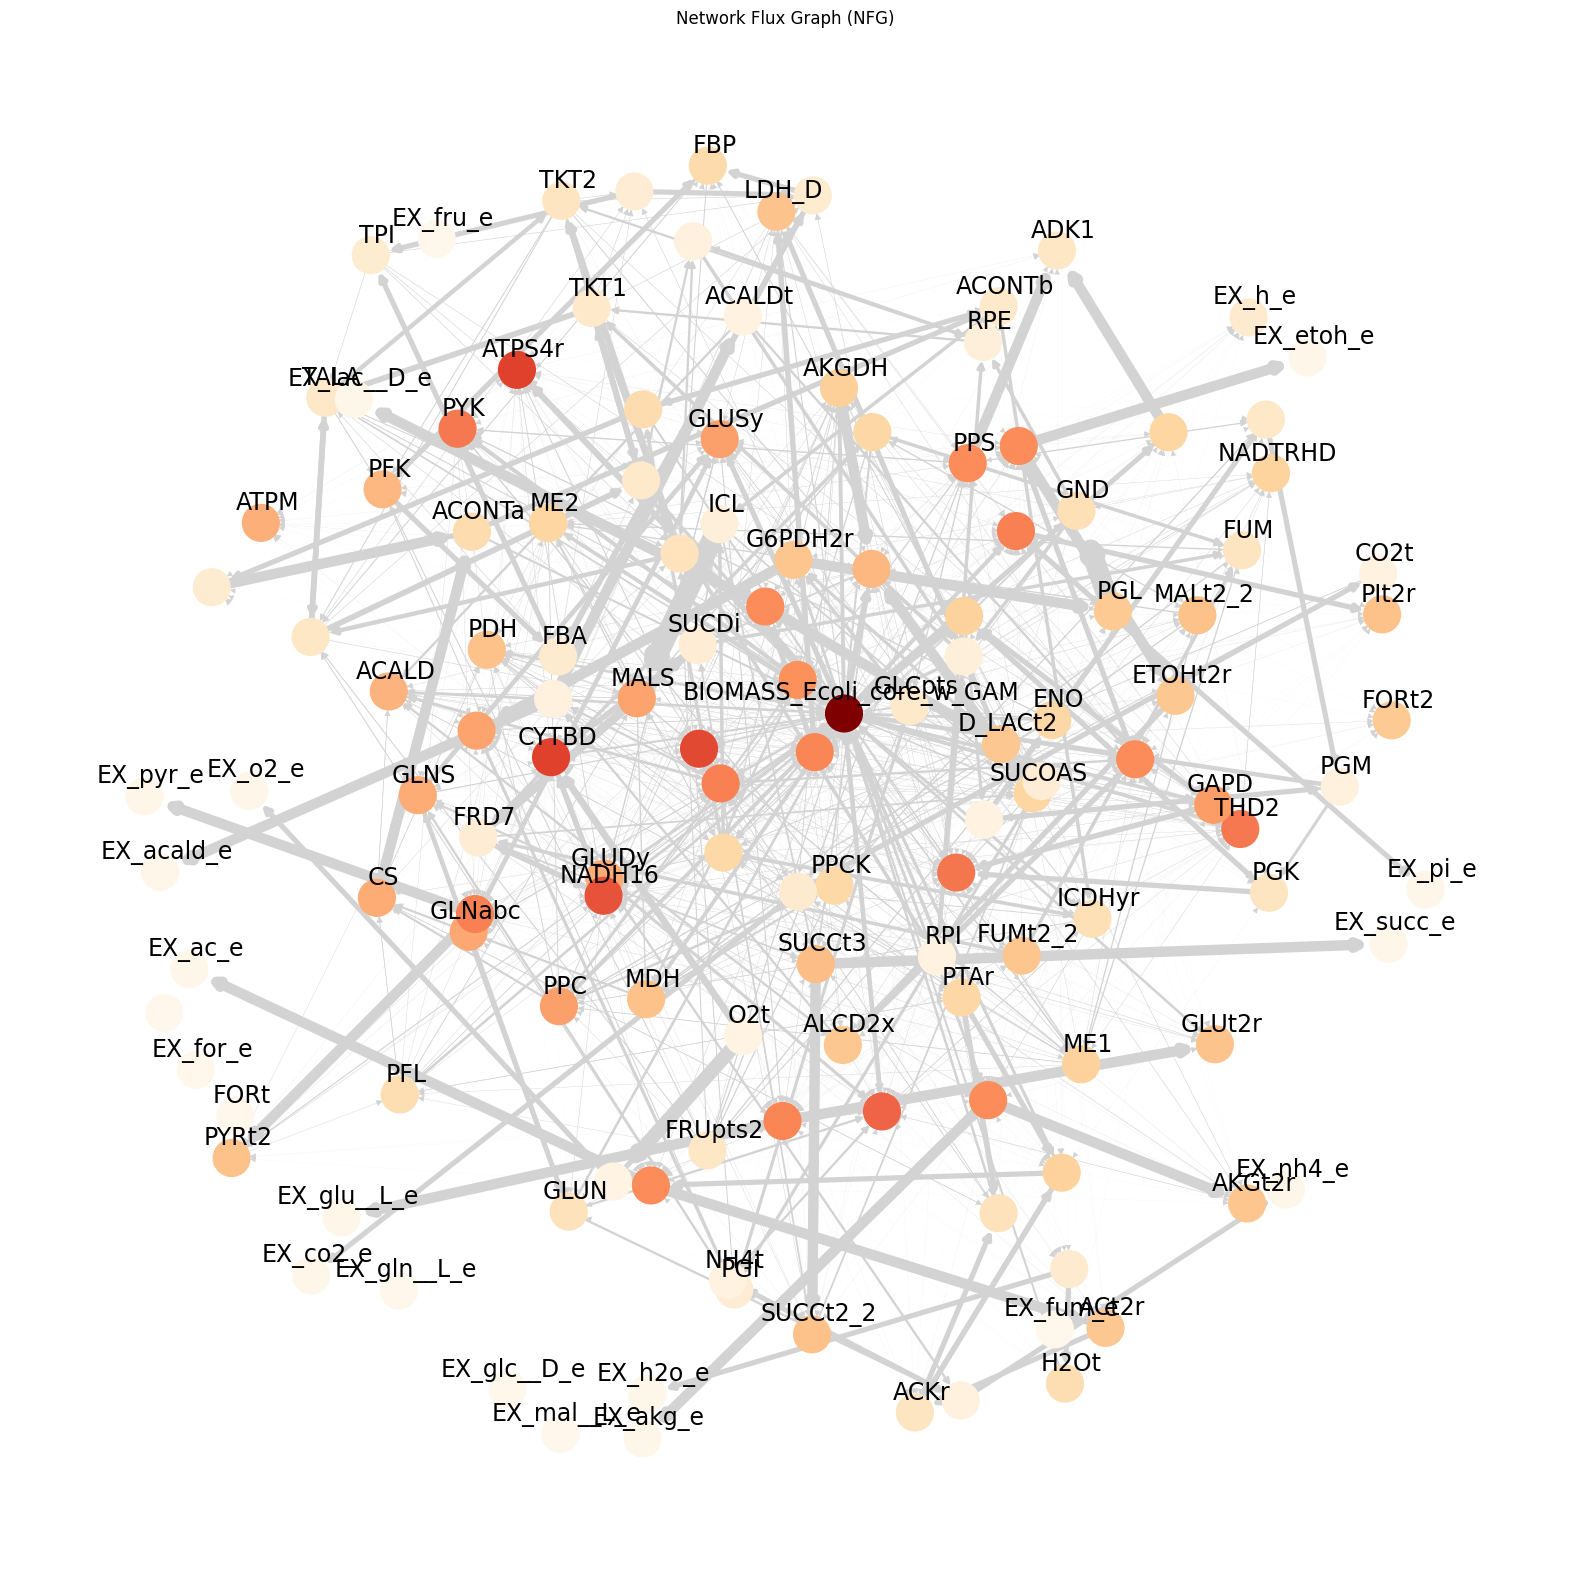

In [19]:
# Convert D matrix into a graph
G = nx.from_numpy_array(D, create_using=nx.DiGraph)
weights = [G[u][v]['weight'] for u,v in G.edges()]
normalized_weights = [(w - min(weights)) / (max(weights) - min(weights)) * (15 - 0.0001) + 0.0001 for w in weights]



# Create a dictionary mapping node indices to reaction names for labeling
reaction_names = [r.id for r in model.reactions]
node_labels = {i: reaction_name for i, reaction_name in enumerate(reaction_names)}

# Calculate the degrees of each node
degrees = [val for (node, val) in G.degree()]

# Normalize the degrees for color mapping
normalized_degrees = [(d - min(degrees)) / (max(degrees) - min(degrees)) for d in degrees]

# Use a colormap to map normalized degrees to colors
cmap = plt.get_cmap('OrRd')  # Choose a colormap here
node_colors = [cmap(deg) for deg in normalized_degrees]


# Plot the graph
fig, ax = plt.subplots(figsize=(20, 20))
pos = nx.spring_layout(G)
nx.draw(G, pos, width=normalized_weights, node_color=node_colors, edge_color='lightgray', node_size=700, ax=ax)

# Labels
label_pos = {node: (x + 0.01, y + 0.03) for node, (x, y) in pos.items()}
nx.draw_networkx_labels(G, label_pos, labels=node_labels, font_size=17, ax=ax)

plt.title('Network Flux Graph (NFG)')
plt.show()

In [164]:
# Load the model (Assuming SBML format)
# Perform FBA
model.objective = 'ATPM'
solution = model.optimize()

# Initialize lists to store bounds and fluxes
lower_bounds = []
upper_bounds = []
fluxes = []

# Iterate over reactions
for reaction in model.reactions:
    lower_bounds.append(reaction.lower_bound)
    upper_bounds.append(reaction.upper_bound)
    fluxes.append(solution.fluxes[reaction.id])

# Convert lists to numpy arrays
lower_bounds = np.array(lower_bounds)
upper_bounds = np.array(upper_bounds)
fluxes = np.array(fluxes)

# Stack arrays horizontally
FluxOpenValue = np.stack((lower_bounds, upper_bounds, fluxes), axis=-1)

FluxOpenValue

array([[    0.  ,  1000.  ,    10.  ],
       [    0.  ,  1000.  ,     0.  ],
       [-1000.  ,  1000.  ,    10.  ],
       [-1000.  ,  1000.  ,   -20.  ],
       [    0.  ,  1000.  ,     0.  ],
       [-1000.  ,  1000.  ,     0.  ],
       [-1000.  ,  1000.  ,     0.  ],
       [-1000.  ,  1000.  ,   -20.  ],
       [-1000.  ,  1000.  ,     0.  ],
       [-1000.  ,  1000.  ,     0.  ],
       [-1000.  ,  1000.  ,     0.  ],
       [-1000.  ,  1000.  ,     0.  ],
       [    0.  ,  1000.  ,     0.  ],
       [-1000.  ,  1000.  ,    20.  ],
       [-1000.  ,  1000.  ,    20.  ],
       [    8.39,  1000.  ,   175.  ],
       [    0.  ,  1000.  ,     0.  ],
       [-1000.  ,  1000.  ,     0.  ],
       [    0.  ,  1000.  ,     0.  ],
       [-1000.  ,  1000.  ,     0.  ],
       [    0.  ,  1000.  ,    20.  ],
       [-1000.  ,  1000.  ,   135.  ],
       [-1000.  ,  1000.  ,     0.  ],
       [    0.  ,  1000.  ,    10.  ],
       [    0.  ,  1000.  ,     0.  ],
       [-1000.  ,  1000. 

0


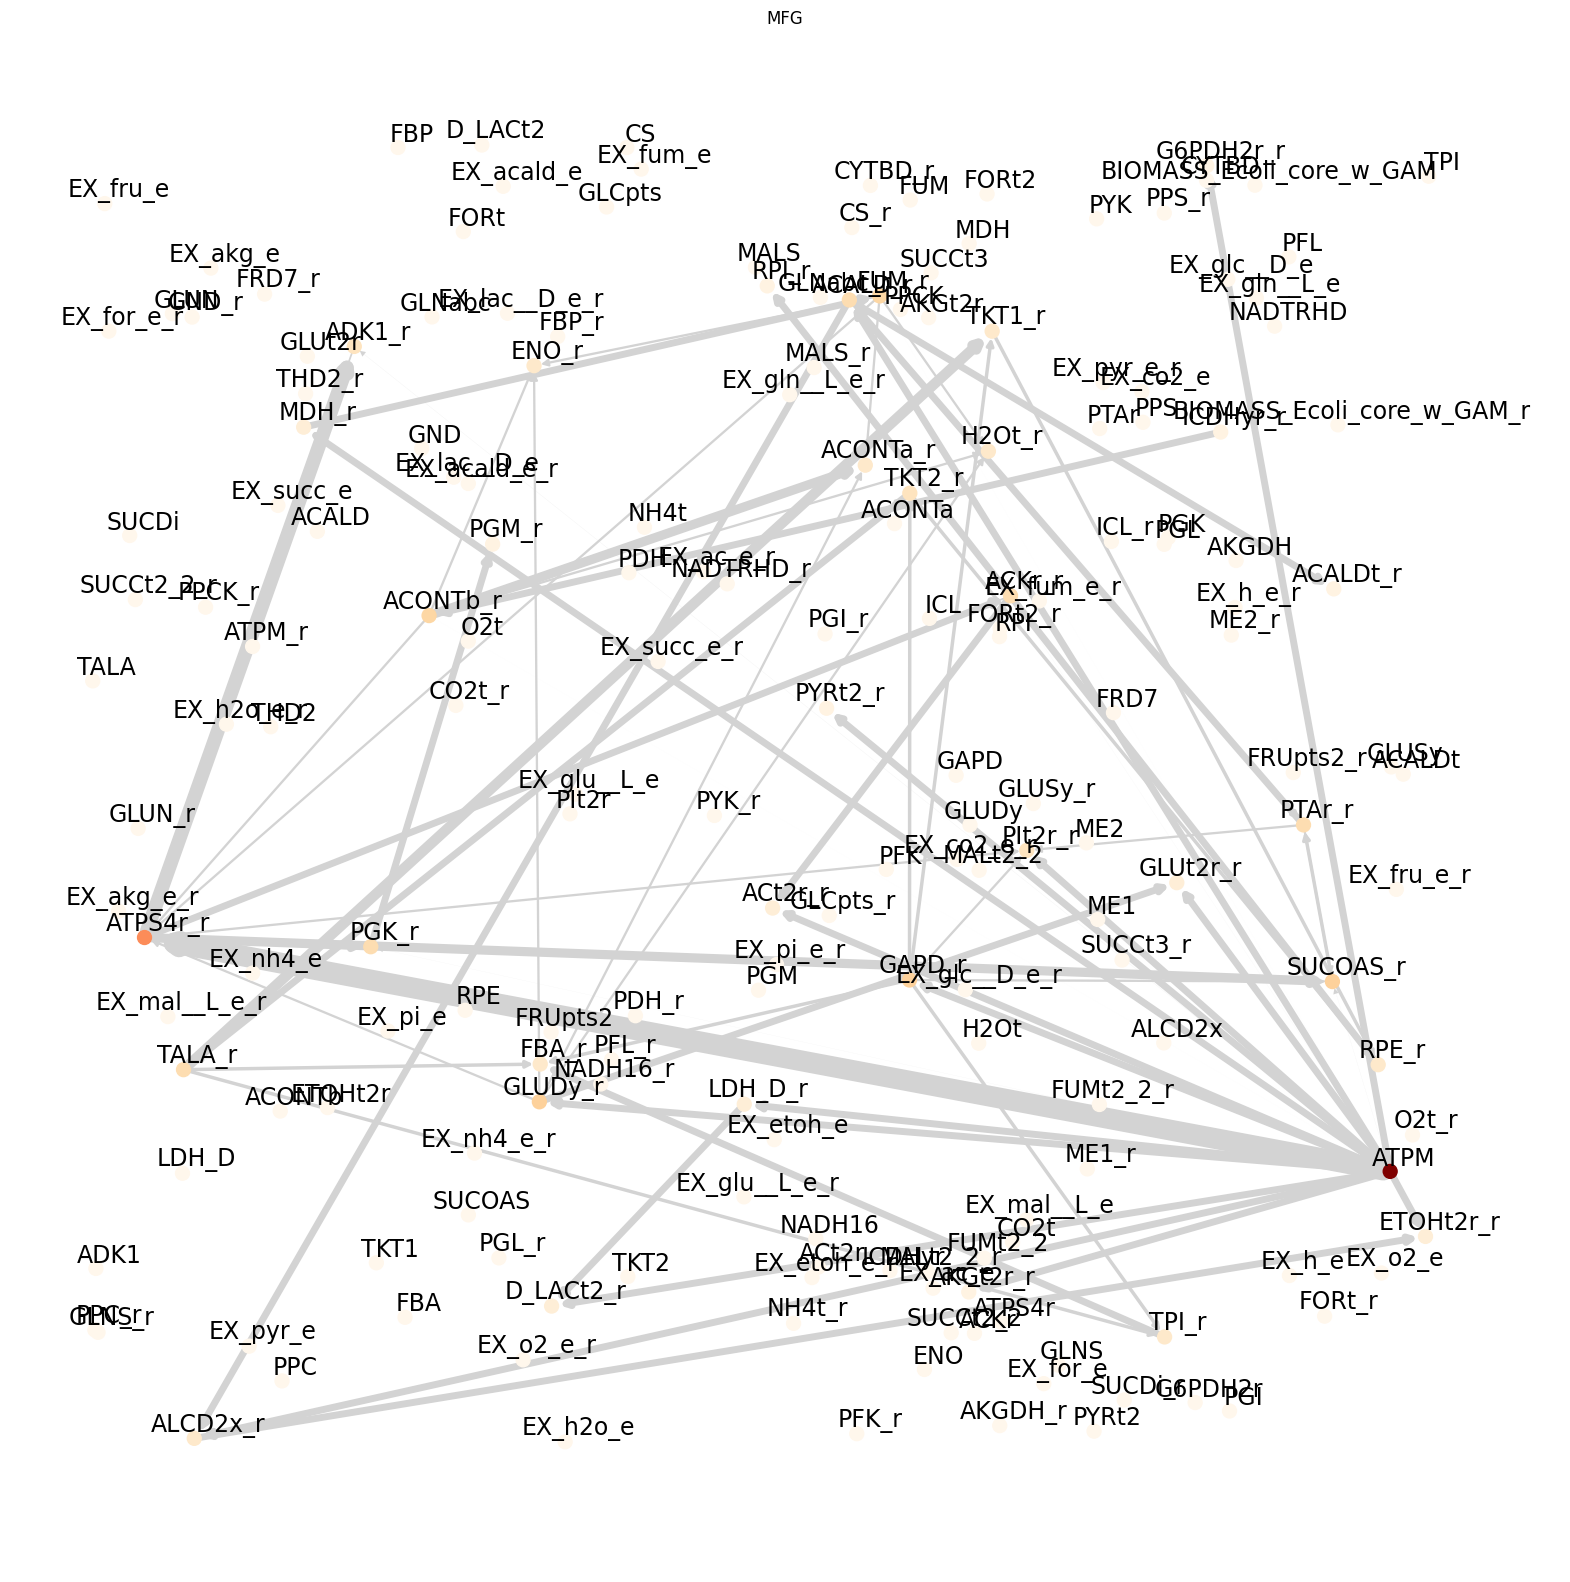

1


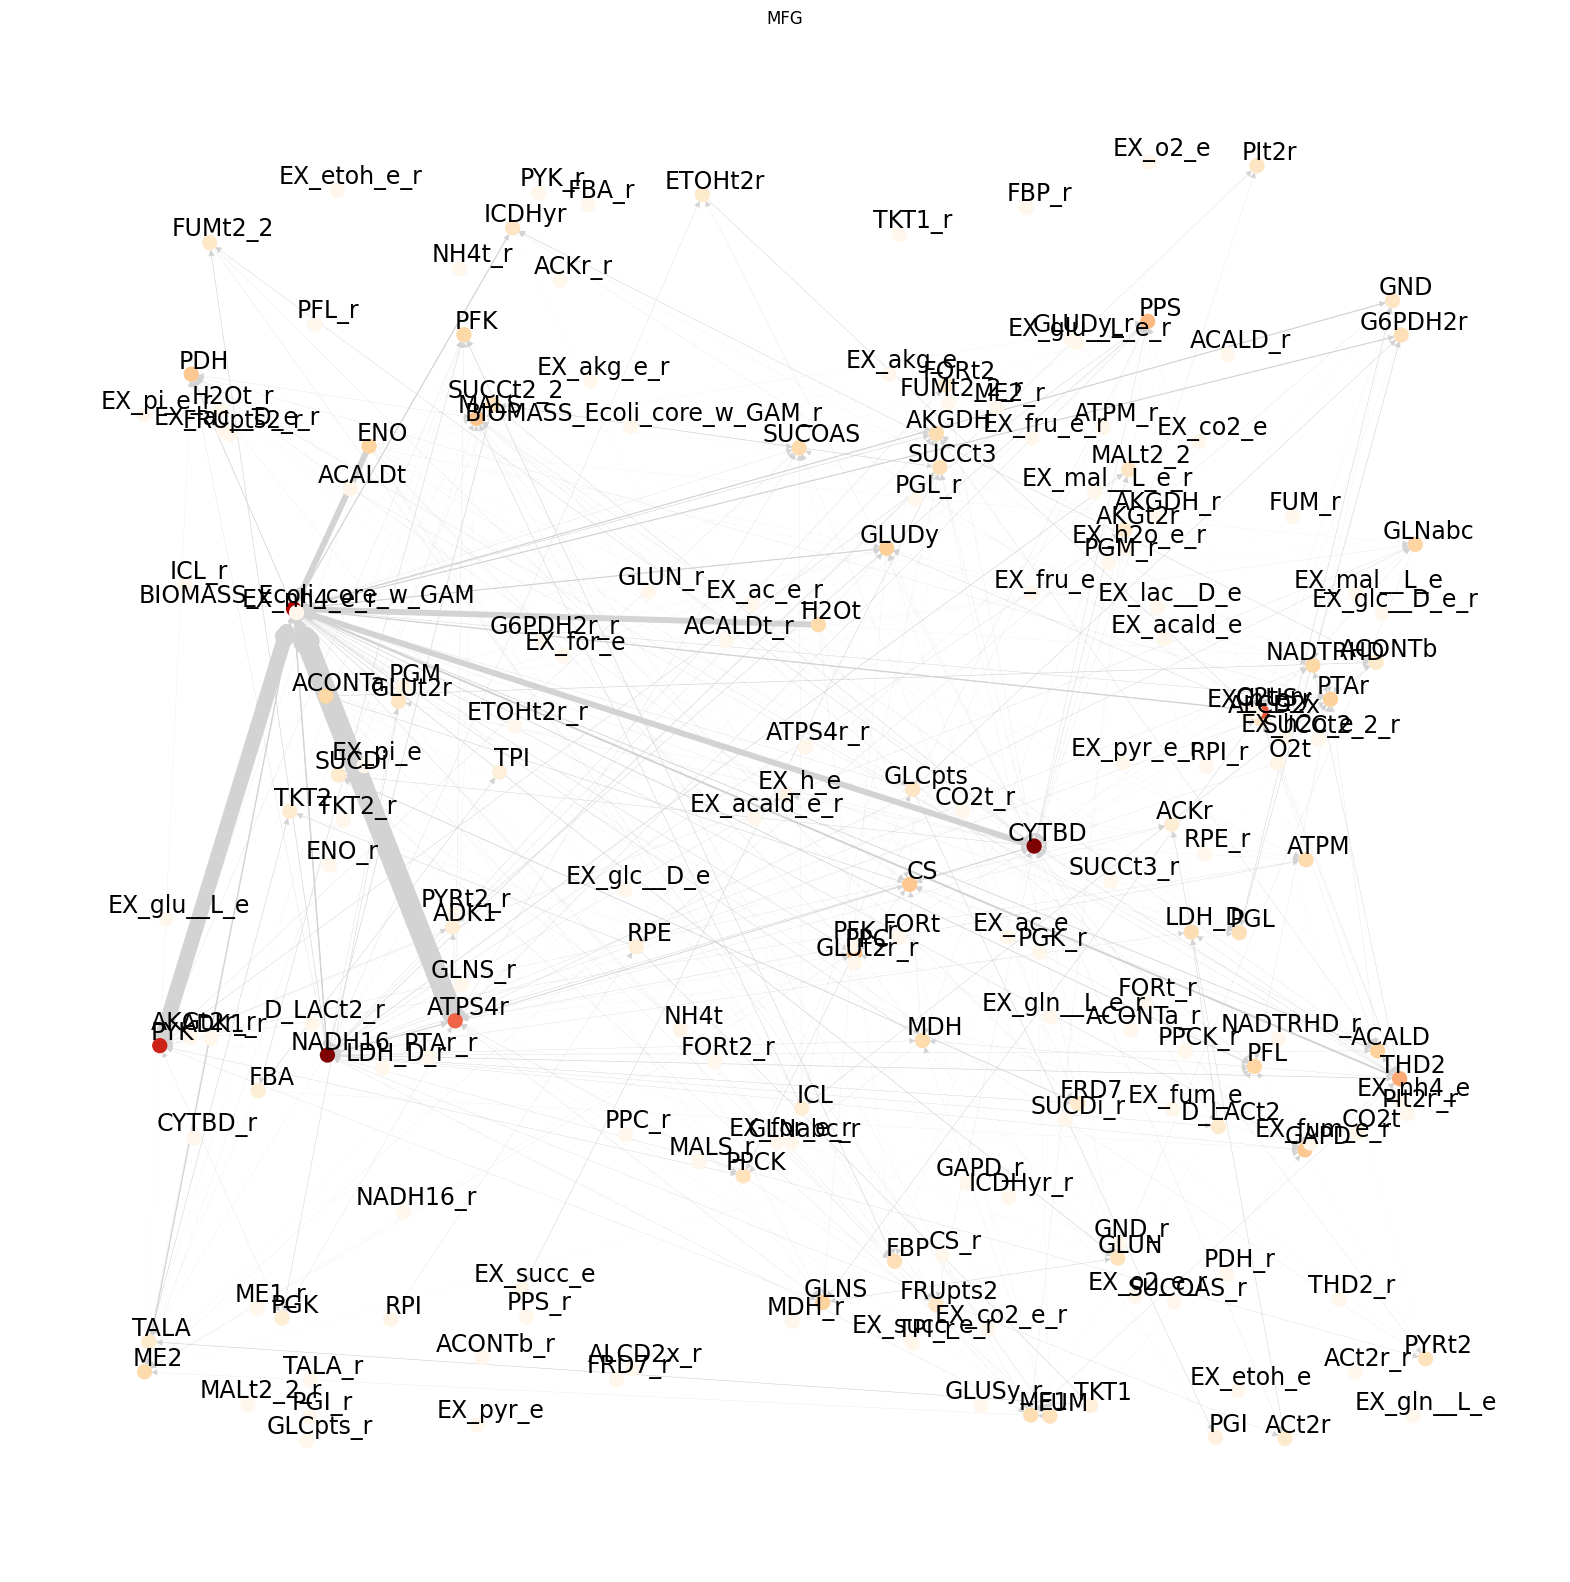

2


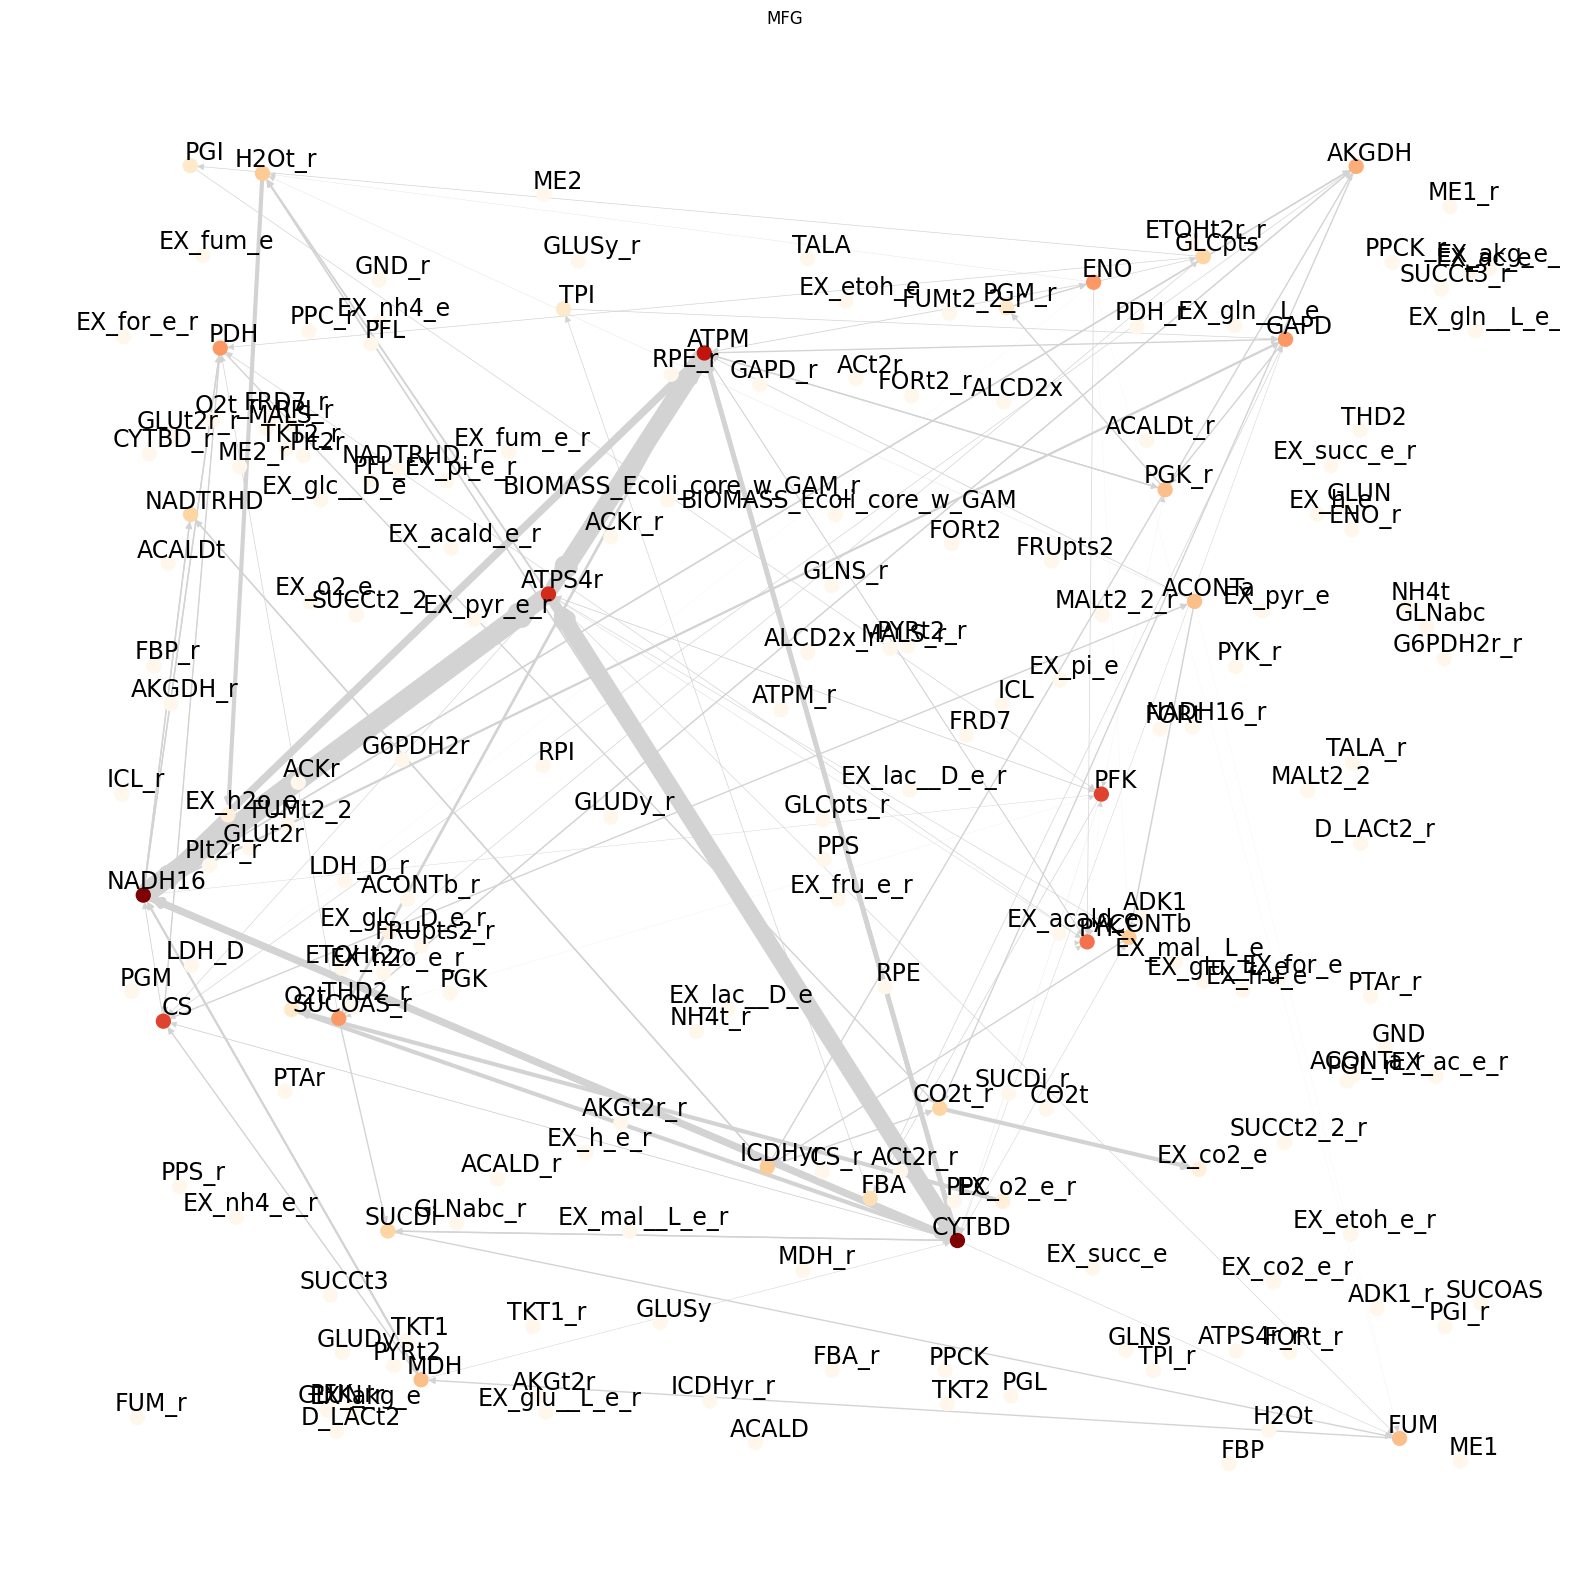

In [212]:
# Calculation of the MFG
PageRank = []
for i in range(FluxOpenValue.shape[1]):
    print(i)
    v1 = FluxOpenValue[:, i].T

    # unfolding the flux vector
    # creation of vplus and vminus
    vplus = (np.abs(v1) + v1) / 2
    vminus = (np.abs(v1) - v1) / 2

    # creation of v2m
    v2m = np.concatenate((vplus, vminus))

    # creation of J_v
    J_v = S2mplus @ v2m.reshape(-1)

    # calculation of the MFG
    M = (S2mplus * v2m).T @ pinv(np.diag(J_v)) @ (S2mminus * v2m)

    # Plot the graph
    G = nx.from_numpy_array(M, create_using=nx.DiGraph)
    weights = [G[u][v]['weight'] for u,v in G.edges()]
    normalized_weights = [(w - min(weights)) / (max(weights) - min(weights)) * (15 - 0.0001) + 0.0001 for w in weights]
    
    #Layout
    pos = nx.random_layout(G)
    
    # Calculate the degrees of each node
    degrees = [val for (node, val) in G.degree()]

    # Normalize the degrees for color mapping
    normalized_degrees = [(d - min(degrees)) / (max(degrees) - min(degrees)) for d in degrees]

    # Use a colormap to map normalized degrees to colors
    cmap = plt.get_cmap('OrRd')  # Choose a colormap here
    node_colors = [cmap(deg) for deg in normalized_degrees]

    
    labels = np.concatenate(([reaction.id for reaction in model.reactions],
                             [reaction.id + '_r' for reaction in model.reactions]))


    fig, ax = plt.subplots(figsize=(20, 20))  # Create a new figure and axes
    nx.draw(G, pos, node_color=node_colors, node_size=100, edge_color='lightgray',
            edge_cmap=plt.cm.Blues, width=normalized_weights, ax=ax)
    label_pos = {node: (x + 0.01, y + 0.01) for node, (x, y) in pos.items()}
    nx.draw_networkx_labels(G, label_pos, labels=node_labels, font_size=17, ax=ax)
    
    plt.title('MFG')
    plt.show()

    # Calculate and store PageRank
    pr = nx.pagerank(G)
    PageRank.append(pr)
    
# Post-processing of PageRank
df = pd.DataFrame(PageRank)
PageRank = df.values
PageRank = np.array(PageRank).T
PageRankRxns = PageRank[:m, :]
PageRankRxns_back = PageRank[m:, :]

for i in range(m):
    for j in range(PageRankRxns.shape[1]):
        if PageRankRxns_back[i, j] > PageRankRxns[i, j]:
            PageRankRxns[i, j] = PageRankRxns_back[i, j]


0
1
2


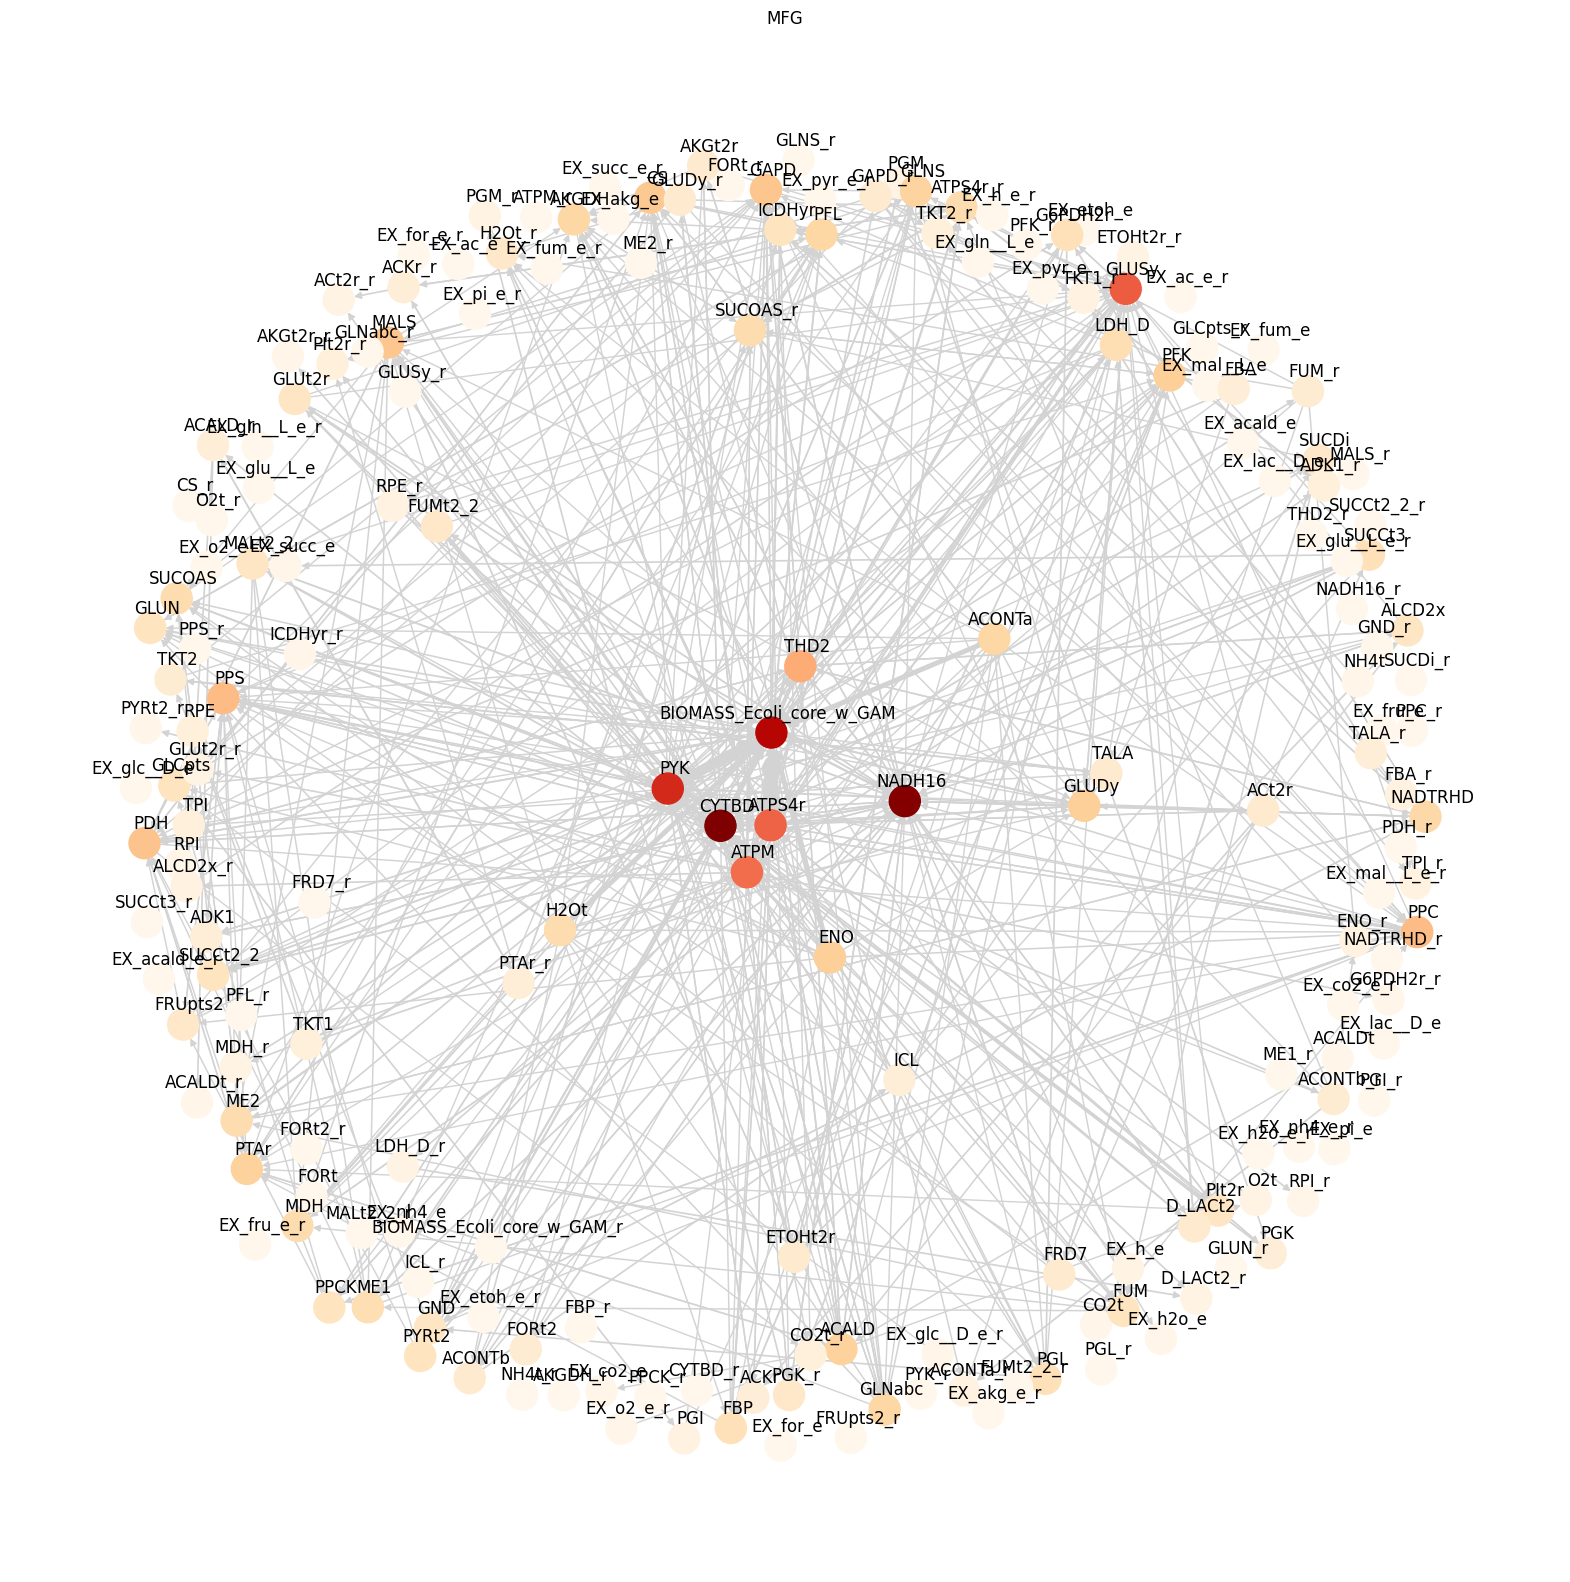

In [211]:
# Calculation of the MFG
PageRank = []
M_total = np.zeros((190, 190))
for i in range(FluxOpenValue.shape[1]):
    print(i)
    v1 = FluxOpenValue[:, i].T

    # unfolding the flux vector
    # creation of vplus and vminus
    vplus = (np.abs(v1) + v1) / 2
    vminus = (np.abs(v1) - v1) / 2

    # creation of v2m
    v2m = np.concatenate((vplus, vminus))

    # creation of J_v
    J_v = S2mplus @ v2m.reshape(-1)

    # calculation of the MFG
    M = (S2mplus * v2m).T @ pinv(np.diag(J_v)) @ (S2mminus * v2m)
    
    M_total = M_total + M

    # Calculate and store PageRank
    G = nx.from_numpy_array(M, create_using=nx.DiGraph)
    pr = nx.pagerank(G)
    PageRank.append(pr)
    

# Post-processing of PageRank
df = pd.DataFrame(PageRank)
PageRank = df.values
PageRank = np.array(PageRank).T
PageRankRxns = PageRank[:m, :]
PageRankRxns_back = PageRank[m:, :]

for i in range(m):
    for j in range(PageRankRxns.shape[1]):
        if PageRankRxns_back[i, j] > PageRankRxns[i, j]:
            PageRankRxns[i, j] = PageRankRxns_back[i, j]
        
        

# Plot the graph
G = nx.from_numpy_array(M_total, create_using=nx.DiGraph)
weights = [G[u][v]['weight'] for u,v in G.edges()]
normalized_weights = [(w - min(weights)) / (max(weights) - min(weights)) * (10 - 1) + 1 for w in weights]

#Layout
pos = nx.spring_layout(G, k=10.75)

# Calculate the degrees of each node
degrees = [val for (node, val) in G.degree()]

# Normalize the degrees for color mapping
normalized_degrees = [(d - min(degrees)) / (max(degrees) - min(degrees)) for d in degrees]

# Use a colormap to map normalized degrees to colors
cmap = plt.get_cmap('OrRd')  # Choose a colormap here
node_colors = [cmap(deg) for deg in normalized_degrees]


labels = np.concatenate(([reaction.id for reaction in model.reactions],
                         [reaction.id + '_r' for reaction in model.reactions]))
node_labels = {i: reaction_name for i, reaction_name in enumerate(labels)}


fig, ax = plt.subplots(figsize=(20, 20))  # Create a new figure and axes
nx.draw(G, pos, node_color=node_colors, node_size=500, edge_color='lightgray',
        edge_cmap=plt.cm.Blues, width=normalized_weights, ax=ax)
label_pos = {node: (x + 0.01, y + 0.03) for node, (x, y) in pos.items()}
nx.draw_networkx_labels(G, label_pos, labels=node_labels, font_size=12, ax=ax)

plt.title('MFG')
plt.show()


In [215]:
PageRankRxns

array([[0.00443622, 0.01285721, 0.00976474],
       [0.00443622, 0.01327891, 0.00310479],
       [0.00443622, 0.00266124, 0.00635191],
       [0.00812026, 0.00281836, 0.00877727],
       [0.00443622, 0.00445166, 0.00310479],
       [0.01140015, 0.01764398, 0.00310479],
       [0.00466557, 0.00316351, 0.00310479],
       [0.0099436 , 0.00167907, 0.00683528],
       [0.00863376, 0.00316351, 0.00310479],
       [0.00853653, 0.0064897 , 0.00310479],
       [0.00830718, 0.00167907, 0.00310479],
       [0.00812026, 0.00473027, 0.00310479],
       [0.00443622, 0.01537395, 0.00310479],
       [0.01076634, 0.00740494, 0.00680704],
       [0.00820739, 0.00245833, 0.00809576],
       [0.00459937, 0.00261617, 0.04350787],
       [0.00443622, 0.00706103, 0.00310479],
       [0.01017295, 0.00316351, 0.00310479],
       [0.00443622, 0.00572223, 0.00310479],
       [0.0118043 , 0.00403734, 0.00310479],
       [0.00443622, 0.01874293, 0.01281394],
       [0.02456961, 0.03174131, 0.08172923],
       [0.